In [1]:
import matplotlib.pyplot as plt
import time
import matplotlib.patches as patches
import numpy as np
from   math import gamma
from supporting_functions import *
from constants import *
from matplotlib.lines import Line2D


dp2 = lambda x : '{:.2f}'.format(x)
ep2 = lambda x : '{:.2e}'.format(x)
ep3 = lambda x : '{:.3e}'.format(x)


## 1. Place any functions here

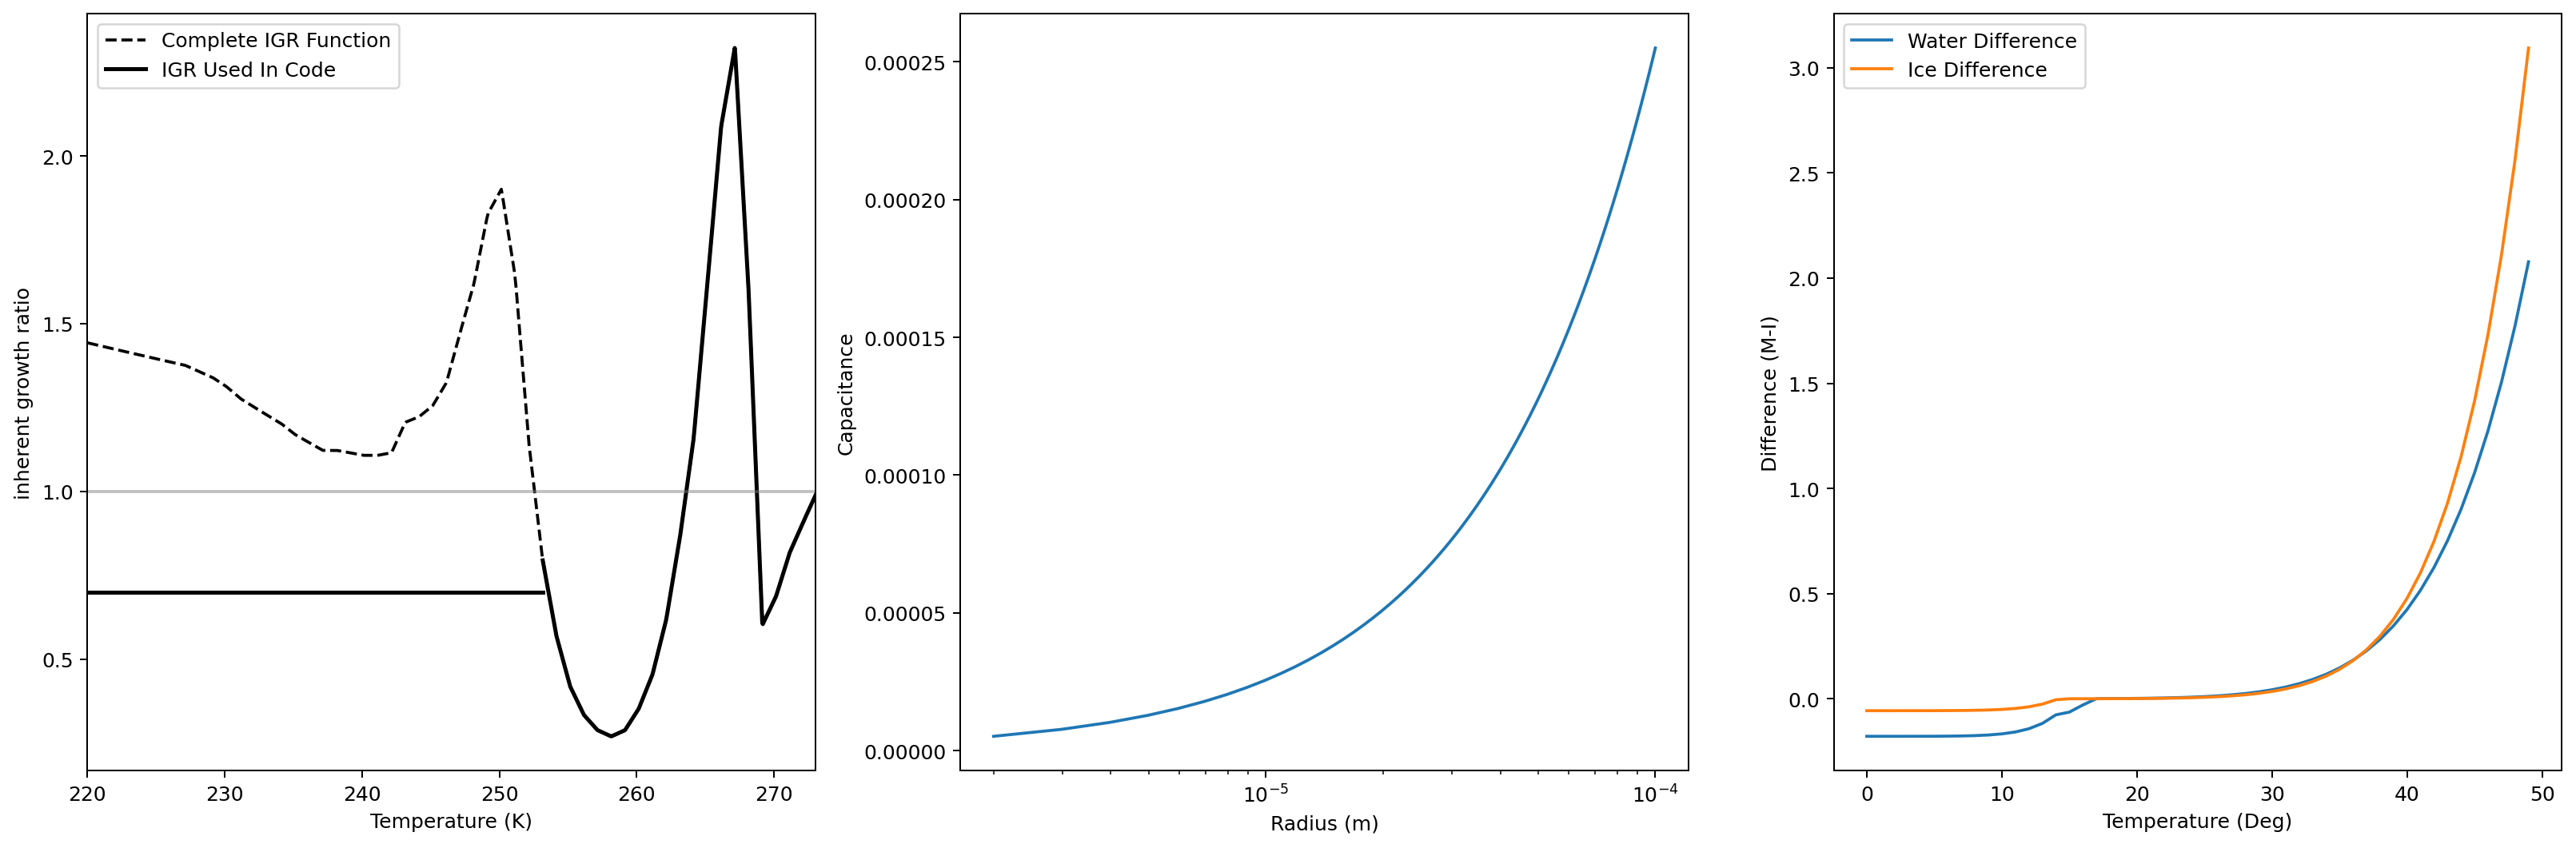

In [2]:
#plot if you want 

PLOT = 'YES'
if PLOT == 'YES':
    fig, ax = plt.subplots(ncols=3, figsize=(18, 6), dpi=180)
    
    #Plot inherent growth ratio
    x  = np.linspace(220, 273.15, 500)
    x2 = np.linspace(253.16, 273.15, 500)
    x3 = np.linspace(220, 253.15, 500)
    y  = [get_igr(i) for i in x]
    y2 = [get_igr(i) for i in x2]
    y3 = [1 for i in x]
    y4 = [0.7 for i in x]
    ax[0].plot(x, y, c='k', ls='--', label='Complete IGR Function')
    ax[0].plot(x2, y2, c='k', lw=2, label='IGR Used In Code')
    ax[0].plot(x3, y4, c='k', lw=2)
    ax[0].plot(x, y3, c='gray', alpha=0.5)
    ax[0].set_xlim(220, 273)
    ax[0].set_xlabel('Temperature (K)')
    ax[0].set_ylabel('inherent growth ratio')
    ax[0].legend()
    
    #plot the capacitance relationship capacitance_gamma(ani, dsdum, alphstr)#note ao**(1-dsdum)
    x2 = np.linspace(2e-6, 1e-4, 100)
    dstmp = 0.2
    astmp = ao**(1-dstmp)
    y2 = [capacitance_gamma(i, dstmp, astmp) for i in x2]
    ax[1].plot(x2, y2)
    ax[1].set_xlabel('Radius (m)')
    ax[1].set_ylabel('Capacitance')
    ax[1].set_xscale('log')

    ###NOTE the polysvp routines are slightly different!
    x = np.linspace(150, 300, 50)
    y_water_M = [polysvp_M(i, 0) for i in x]
    y_ice_M   = [polysvp_M(i, 1) for i in x]
    y_water_I = [polysvp_I(i, 0) for i in x]
    y_ice_I   = [polysvp_I(i, 1) for i in x]

    ax[2].plot([a-b for a,b in zip(y_water_M, y_water_I)], label='Water Difference')
    ax[2].plot([a-b for a,b in zip(y_ice_M, y_ice_I)], label='Ice Difference')
    
    ax[2].set_xlabel('Temperature'), ax[2].set_xlabel('Temperature (Deg)')
    ax[2].set_ylabel('Difference (M-I)')
    ax[2].legend()
    
    fig.tight_layout()
    

In [3]:
def capacitance_gamma(ani, dsdum, alphstr):
    NU = 4 #constant
    nu=NU
    i_gammnu = 1/(gamma(NU))
    
    #Oblate Spheroid
    if (dsdum <= 1): 
        a1 = 0.6369427      
        a2 = 0.57*a1
        b1 = 0.0
        b2 = 0.95   
        
        c1 = a1*alphstr**b1
        c2 = a2*alphstr**b2
        d1 = b1*(dsdum - 1.0) + 1.0
        d2 = b2*(dsdum - 1.0) + 1.0
        
    #!.. Prolate Spheroid
    elif (dsdum > 1):
        a1 = 0.5714285
        a2 = 0.75*a1
        b1 = -1.0
        b2 = -0.18 
        
        c1 = a1*alphstr**(b1+1.0)
        c2 = a2*alphstr**(b2+1.0)
        d1 = b1*(dsdum - 1.0) + dsdum
        d2 = b2*(dsdum - 1.0) + dsdum
      
    
    #get capacitance 
    if(dsdum <= 1):
        gammad1 = (gamma(nu+d1))
        gammad2 = (gamma(nu+d2))
        capacitance_gamma = (c1*ani**d1) * gammad1*i_gammnu + c2*ani**d2 * gammad2*i_gammnu
    elif(dsdum > 1):
        gammad1 = (gamma(nu+d1))
        gammad2 = (gamma(nu+d2))
        capacitance_gamma = c1*ani**d1 * gammad1*i_gammnu  + c2*ani**d2 * gammad2*i_gammnu
    
    return capacitance_gamma

In [4]:
def get_gamma(Scheme, ni, qi, ani = 0):
    
    D  = np.logspace(-8, -1, 1000)
    
    if Scheme == 'M':
        alfa = P_c+1 #P_c should = 0, alfa = 1
        beta = ((ni/qi) * c * gamma(alfa+DI) / gamma(alfa))**(1/DI)
        print('average d Morrison', 1/beta)
        N_0  = ni * beta**alfa / gamma(alfa)
       #For Morrison x = D
        x = D
    elif Scheme == 'I':
        NU = 4
        alfa = NU
        beta = 1/ani #(ni/qi)  * 4*PI/3 *rhobar *()
        print('average d ISHMAEL', ani*4)
        N_0  = ni* beta**alfa / gamma(alfa)
        #for ISHMAEL we must convert radius to diameter
        x  = D/2
    
    #plot general form !!!!!
    f_x   = N_0 *  x**(alfa-1)  * np.exp(-beta*x)
    
    #Print some information on the whole distribution
 
    return x , f_x

In [5]:
def check_minmax(var, mini, maxi):
    if var > maxi:
        var = maxi
    elif var < mini:
        var = mini 
    else:
        pass
    return var

In [6]:
#ensure evertyhing is in order (ISHMAEL)

def check_environment_I(temp, pres_e, qv):
    theta1  = temp*(100000/pres_e)**(RCP)
    i_temp = 1/temp
    svpl   = polysvp_I(temp,0)
    qvs    = 0.622*svpl/(pres_e-svpl)
    sup    = qv/qvs-1

    svpi   = polysvp_I(temp,1)
    qvi    = 0.622*svpi/(pres_e-svpi)

    if(temp > T0):
        qvi = qvs
        
    sui   = qv/qvi-1
    
    return theta1, i_temp, svpl, qvs, sup, svpi, qvi, sui

In [7]:
def initialise_ISH(qi_init, ni_init, ani_init, cni_init):
    
    #suppose we are choosing qi, ni and the characateristic radii
    ai_init, ci_init = 0,0 

    ai_init  = max((ani_init**3 * (ci_init*ni_init))**(0.5),QASMALL)
    ci_init  = max(( cni_init**3 * (ai_init*ni_init))**(0.5), QASMALL)    
    rni_init = 0
    
    deltastr_init = (np.log(cni_init)-np.log(ao))/(np.log(ani_init)-np.log(ao)) #Delta_* (Average inherent growth ratio)

    return  ai_init, ci_init, rni_init, deltastr_init

    #=========== run var check to update variables ===========
    qi, deltastr, ani, cni, rni, rhobar, ni, ai, ci, alphstr = ISHMAEL_var_check(qi_init, deltastr_init, ani_init, cni_init, rni_init, rhobar_init, ni_init, ai_init, ci_init)

        

In [8]:
def calculate_environment_I(temp, pres_e, qv, ni):
    
    theta   = temp*(100000/pres_e)**(RCP)
    i_temp  = 1/temp
    rhoair  = pres_e/(R*temp) 
    i_rhoair= 1/rhoair 
    dv      = (8.794E-5*temp**1.81)/pres_e      #Diffusivity of water vapor in air 
    xxls    = (3.15e6)-2370*temp + (3.337e5)
    mu      = 1.496e-6*temp**1.5/(temp+120)
    nsch    = mu/(rhoair*dv)
    kt      = 2.3823e-2 +7.1177e-5*(temp-T0)
    xxlv    = 3.1484E6-2370*temp        
    xxlf    = xxls - xxlv
    npr     = mu*i_rhoair/kt  #Prandlt number
    svpl    = polysvp_I(temp,0)
    svpi    = polysvp_I(temp,1)
    qvs     = 0.622*svpl/(pres_e-svpl)#liquid saturation vapor mixing ratio (kg kg^-1) 
    qvi     = 0.622*svpi/(pres_e-svpi)#Ice saturation vapor mixing ratio (kg kg^-1)
    sui     = qv/qvi-1 #ice supersaturation ratio
    sup     = qv/qvs-1 #liquid supersaturation ratio
    nim3dum = ni*rhoair 
    

    if(temp > T0):
        qvi = qvs
    
    
    #Inherent growth ratio data from Lamb and Scott 1972 and Chen and Lamb 1994
    #Assumes planar particles at temperatures below -20C (see Bailey and Hallett)
    #Function of temperature only    
    igr = get_igr(temp)
    if((temp-T0) < -20):
        igr=0.7

    return theta, i_temp, svpl, qvs, sup, svpi, qvi, rhoair, i_rhoair, dv, xxls, mu, nsch, kt, xxlv, \
            xxlf, npr,igr, nim3dum, sui
    
    
    
    
    
def calculate_environment_M(T, PRES, QV3D, NI3D, QI3D, NS3D, QNI3D, NG3D, QG3D):

    
    RHO_A  = PRES/(R*T)                   #Air density
    DV     = (8.794E-5*T**1.81)/PRES      #Diffusivity of water vapor in air 
    XXLS   = (3.15e6)-2370*T + (3.337e5)  #Latent heating term 
    MU     = 1.496e-6*T**1.5/(T+120)      # Viscoscity of air
    SC     = MU/(RHO_A*DV)                #Schmidt number
    CPM    = CP*(1.+0.887*QV3D)           #SPECIFIC HEAT AT CONST PRESSURE FOR MOIST AIR
    ASN    = 11.2*(RHOSU/RHO_A)**0.54     #Snow factor in fall speed relation
    AGN    = 19.3*(RHOSU/RHO_A)**0.54     #Graupel factor in fall speed relation
    
    #get the dist params
    LAMI, NOI, LAMS, NOS, LAMG, NOG = dist_params_M(NI3D, QI3D, NS3D, QNI3D, NG3D, QG3D)
    
    EIS    = polysvp_M(T, 1) 
    QVI    = EP_2*EIS/(PRES-EIS)                      #Ice saturation mixing ratio
    DQSIDT = XXLS*QVI/(RV*T**2)
    ABI    = (1+DQSIDT*XXLS/CPM)
    DUM    = (1-np.exp(-LAMI*DCS)*(1+LAMI*DCS))


    #CALCULATE RELAXATION TIMES (1/tau) =========================================================== 
    EPSG, EPSS = 0, 0
    EPSI       = 2*np.pi * NOI * RHO_A * DV / (LAMI)**2 

    if QNI3D > 0:
        EPSS   = 2.*np.pi*NOS*RHO_A*DV*(F1S/(LAMS**2)+F2S*(ASN*RHO_A/MU)**0.5* SC**(1/3)*CONS10/(LAMS**CONS35))
    if QG3D > 0:
        EPSG   = 2*np.pi*NOG*RHO_A*DV*(F1S/(LAMG**2)+F2S*(AGN*RHO_A/MU)**0.5*SC**(1/3)*CONS11/(LAMG**CONS36))
 
    
    return RHO_A, DV, XXLS, MU, SC, EP_2, CPM, ASN, AGN, LAMI, NOI, LAMS, NOS, LAMG, NOG, QVI, ABI, EPSS, EPSI, EPSG


In [9]:
#FORMALLY PRODUCE INITIAL DISTRIBUTIONS OF ALL HYDROMETEORS (Need NOI, P_cx and LAM)

#ICE 
def dist_params_M(NI3D, QI3D, NS3D, QNI3D, NG3D, QG3D):
    LAMS, LAMG, NOS, NOG = 0, 0, 0, 0
    
    if QI3D > 0:
#         print("Ice available")
        LAMI   = (CONS12*(NI3D/QI3D))**(1/DI)
        LAMI   = check_minmax(LAMI, LAMMINI, LAMMAXI)     #
        NOI    = NI3D*LAMI
        
    if QNI3D > 0:
#         print("Snow available")
        LAMS   = (CONS1*(NS3D/QNI3D))**(1/DS)
        LAMS   = check_minmax(LAMS, LAMMINS, LAMMAXS)
        NOS    = NS3D*LAMS

    if QG3D > 0:
#         print("Graupel available")
        LAMG   = (CONS2*NG3D/QG3D)**(1/DG)
        LAMG   = check_minmax(LAMG, LAMMING, LAMMAXG)
        NOG    = NG3D*LAMG

    #Dimension given by LAMI
#     print('Morrison ice has diameter', 1/LAMI)
#     print('Morrison ice has volume', (4*np.pi/3)*(1/(2*LAMI))**3)
    
    return LAMI, NOI, LAMS, NOS, LAMG, NOG

In [10]:
#Update the thermodynamics in ISHMAEL

def post_deposition_environment_update_I(dt, theta1, temp, i_temp, prd, xxls, pres_e, rhoair):
   
    theta2    = theta1+( theta1*i_temp*(prd*xxls*i_cp*dt) )    
    #for now set temp to be constant
    temp2 = temp
#     temp2     = theta1/(100000/pres_e)**(RCP)
    qvs       = 0.622*polysvp_I(temp,0)/(pres_e-polysvp_I(temp,0))
    xxlv      = 3.1484e6-2370*temp   
#     PRES      = rhoair*(R*temp)
    PRES = pres_e
#     rhoair    = pres_e/(RD*temp)
    i_rhoair  = 1/rhoair

    #below not used currently ----
    # theta(k)=theta(k)+theta(k)*i_temp*((mnuccd)*xxls*i_cp*dt)
    # theta(k)=theta(k)+theta(k)*i_temp*((qmlt(cc))*xxlf*i_cp*dt)
    # theta(k)=theta(k)+theta(k)*i_temp*(pre*xxlv)*i_cp*dt

    # if(temp < T0):
    #     theta(k)=theta+theta*i_temp*(mim+mimr+mbiggr)*xxlf*i_cp*dt
    #     theta(k)=theta(k)+theta(k)*i_temp*(prdr(cc)+dQRfzri(cc))*xxlf*i_cp*dt


    #recalculate pressure based on Daltons law ?
    ######


    # #Saturation adjustment for qc
    # pcc = (qv-qvs) / (1 + xxlv**2*qvs/(CP*rv*temp**2))*i_dt
    # if (pcc*dt+qc < 0):
    #     pcc=-qc/dt

    # theta = theta + theta*i_temp*pcc*xxlv*i_cp*dt
    # qv    = qv - pcc*dt
    # qc    = qc + pcc*dt

    # if qc < QSMALL:
    #     qv    = qv+qc
    #     theta = theta+theta*i_temp*(qc*xxlv)*i_cp
    #     qc    = 0
    #     nc    = 0
    return theta2, temp2, qvs, xxlv, rhoair, i_rhoair, PRES
       

In [11]:
 #AUTOCONVERSION OF CLOUD ICE TO SNOW testing
    
def autoconvert_ice_to_snow(DT, QI, NI3D, QV3D, QVI, LAMI, RHO_A, ABI, DV):
    
    N0I = NI3D*LAMI
    
    if 2/LAMI > DCS:
            NPRCI = CONS21*(QV3D-QVI)*RHO_A *N0I*np.exp(-LAMI*DCS)*DV/ABI
            PRCI  = CONS22*NPRCI
            NPRCI = min(NPRCI,NI3D/DT)
            
            
    return NPRCI, PRCI
        

In [12]:
dsdum=1
ni0, qi0 = 1e6, 1e-5
ani0     = ((qi0*6)/(900*ni0*(4*np.pi*ao**(1-ds_init)/3)* gamma(6+ds_init)))**(1/(2+ds_init))
betam    = 2+dsdum
gi       = NU+2+dsdum
alphstr  = ao**(1-dsdum)
alphv    = fourthirdspi*alphstr
rbdum    = qi0*6/(ni0*alphv*ani0**betam*gamma(gi))
print(rbdum, ani0)

#now with var check


NameError: name 'ds_init' is not defined

In [13]:
def iterate_timesteps(NT, DT, qi0, ni0, P0, T1, qv0, ani0, cni0, simtype=1, VERBOSE=False, CST_SF='NO'):

    """Inputs to this function are fixed only for the first timestep!
    
    simtype=1 --> (input) Pressure, Temperature, Vapor, are fixed
    
    simtype=2 --> (input) Pressure, Temperature are fixed but vapor is exchanged
    
    simtype=3 --> (input) variables are not fixed
    
    """
    
    
    rhobar_init   = 900
    ai_init, ci_init, rni_init, deltastr_init = initialise_ISH(qi0, ni0, ani0, cni0)
    
    #begin with snow or graupel
    qs0, ns0, qg0, ng0 = 0,0,0,0
    
    #=============================================
    #=== get init variables  =====================
    #=============================================
    
    #below variables used only to populate first index in dictionaries, will be deleted!!
    theta_itmp, i_temp_itmp, svpl_itmp, qvs_itmp, sup_itmp, svpi_itmp, qvi_itmp, rhoair_itmp, i_rhoair_itmp, dv_itmp, xxls_itmp, mu_itmp, nsch_itmp, \
    kt_itmp, xxlv_itmp, xxlf_itmp, npr_i,igr_itmp, nim3dum_itmp, sui_itmp = calculate_environment_I(T1, P0, qv0, ni0)
    
    qitmp, deltastrtmp, anitmp, cnitmp, rnitmp, rhobartmp, nitmp, aitmp, citmp, alphstrtmp = ISHMAEL_var_check(qi0, deltastr_init, ani0, cni0, rni_init, rhobar_init, ni0, ai_init, ci_init)

    captmp = capacitance_gamma(anitmp, deltastrtmp, alphstrtmp)
    
    RHO_A_Mtmp, DV_mtmp, XXLS_mtmp, MU_mtmp, SC_mtmp, EP_2_mtmp, CPM_mtmp, ASN_mtmp, AGN_mtmp, LAMItmp, NOItmp, LAMStmp, NOStmp, LAMGtmp, NOGtmp, QVItmp,ABItmp, EPSStmp, EPSItmp, EPSGtmp = \
    calculate_environment_M(T1, P0, qv0, ni0, qi0, 0,0,0,0)
    
    #initialise variable dictionaries and add the initial value 
    ISHMAEL_DICT  = {'qi':[qi0], 'ni':[ni0], 'P':[P0], 'T':[T1], 'QV':[qv0], 'deltastr':[deltastr_init],
                     'ani':[anitmp], 'cni':[cni0], 'rni':[rnitmp],'rhobar':[rhobartmp], 'ai':[ai_init],
                    'ci':[ci_init], 'prd':[np.nan], 'rhoair':[rhoair_itmp], 'capacitance':[captmp], 'r_av':[4*ani0], 
                    'AR':[cni0/ani0], 'shape_factor':[captmp/rni_init], 'sat_i':[qv0/qvi_itmp], 'afn':[np.nan],
                    'rhodep':[np.nan],'anfTMP':[np.nan],  'rnfTMP':[np.nan],}
    
    MORRISON_DICT = {'qi':[qi0], 'ni':[ni0], 'qs':[qs0], 'ns':[ns0], 'qg':[qg0], 'ng':[ng0], 'P':[P0], 'T':[T1],
                     'QV':[qv0], 'prd':[np.nan], 'rhoair':[RHO_A_Mtmp],'capacitance':[1/LAMItmp], 'r_av':[1/LAMItmp], 
                    'r_av_s':[np.nan], 'AR':[1], 'sat_i':[qv0/QVItmp], 'prds':[np.nan], 'prdg':[np.nan], 'EPSS':[np.nan],
                    'EPSI':[np.nan], 'ABI':[np.nan]}
    
    #erase the temp variables used to populate the dictionary 
    del theta_itmp, i_temp_itmp, svpl_itmp, qvs_itmp, sup_itmp, svpi_itmp, qvi_itmp, rhoair_itmp, i_rhoair_itmp, dv_itmp, xxls_itmp, mu_itmp, nsch_itmp
    del kt_itmp, xxlv_itmp, xxlf_itmp, npr_i,igr_itmp, nim3dum_itmp, sui_itmp
    del qitmp, deltastrtmp, anitmp, cnitmp, rnitmp, rhobartmp, nitmp, aitmp, citmp, alphstrtmp, captmp
    del RHO_A_Mtmp, DV_mtmp, XXLS_mtmp, MU_mtmp, SC_mtmp, EP_2_mtmp, CPM_mtmp, ASN_mtmp, AGN_mtmp, LAMItmp, NOItmp, LAMStmp, NOStmp, LAMGtmp, NOGtmp, QVItmp,ABItmp, EPSStmp, EPSItmp, EPSGtmp
    
#     print('Model run starting')
    start=time.time()
#     print('===============================================')
        
    for D in range(NT):
        if VERBOSE == True:
            print()
            print('TIMESTEP', D)
            print('===============================================')
            
        #initialisation time step
        if D == 0:
            
            qi_I, ni_I, P_I, T_I, QV3D_I, deltastr_I, ani_I, cni_I, rni_I, rhobar_I, ai_I, ci_I, prd_I, rhoair_I, capgam, fs, phi, sat_i_i, afn_i, rhodep, anfTMP, rnfTMP \
            = run_Vapordep_I(DT, qi0, ni0, P0, T1, qv0, deltastr_init, ani0, cni0, rni_init, rhobar_init, ai_init, ci_init, VERBOSE, simtype, CST_SF)
            
            qi_M, ni_M, qs_M, ns_M, qg_M, ng_M, P_M, T_M, QV3D_M, prd_M, prds_M, prdg_M, RHO_A_M, d_avm, d_avms, sat_i_m, EPSS_m, EPSI_m, ABI_m = run_Vapordep_m(DT, qi0, ni0, qs0, ns0, qg0, ng0, P0, T1, qv0, VERBOSE, simtype)
            
        else: 
            qi_I, ni_I, P_I, T_I, QV3D_I, deltastr_I, ani_I, cni_I, rni_I, rhobar_I, ai_I, ci_I, prd_I, rhoair_I, capgam, fs, phi, sat_i_i, afn_i, rhodep, anfTMP, rnfTMP = \
            run_Vapordep_I(DT, qi_I, ni_I, P_I, T_I, QV3D_I, deltastr_I, ani_I, cni_I, rni_I, rhobar_I, ai_I, ci_I, VERBOSE, simtype, CST_SF)
            
            qi_M, ni_M, qs_M, ns_M, qg_M, ng_M, P_M, T_M, QV3D_M, prd_M, prds_M, prdg_M, RHO_A_M, d_avm, d_avms, sat_i_m, EPSS_m, EPSI_m, ABI_m = run_Vapordep_m(DT, qi_M, ni_M, qs_M, ns_M, qg_M, ng_M, P_M, T_M, QV3D_M, VERBOSE, simtype)

        #Note these are at the end of the timestep!
        ISHMAEL_DICT['qi'].append(qi_I)
        ISHMAEL_DICT['ni'].append(ni_I)
        ISHMAEL_DICT['P'].append(P_I)
        ISHMAEL_DICT['T'].append(T_I)
        ISHMAEL_DICT['QV'].append(QV3D_I)
        ISHMAEL_DICT['deltastr'].append(deltastr_I)
        ISHMAEL_DICT['ani'].append(ani_I)
        ISHMAEL_DICT['cni'].append(cni_I)
        ISHMAEL_DICT['rni'].append(rni_I)
        ISHMAEL_DICT['rhobar'].append(rhobar_I)
        ISHMAEL_DICT['ai'].append(ai_I)
        ISHMAEL_DICT['ci'].append(ci_I)
        ISHMAEL_DICT['prd'].append(prd_I)
        ISHMAEL_DICT['rhoair'].append(rhoair_I)
        ISHMAEL_DICT['capacitance'].append(capgam)
        ISHMAEL_DICT['shape_factor'].append(fs)
        ISHMAEL_DICT['r_av'].append(4*ani_I)
        ISHMAEL_DICT['AR'].append(phi)
        ISHMAEL_DICT['sat_i'].append(sat_i_i)
        ISHMAEL_DICT['afn'].append(afn_i)   
        ISHMAEL_DICT['rhodep'].append(rhodep)
        ISHMAEL_DICT['anfTMP'].append(anfTMP)
        ISHMAEL_DICT['rnfTMP'].append(rnfTMP)

        
        MORRISON_DICT['qi'].append(qi_M)  
        MORRISON_DICT['ni'].append(ni_M)
        MORRISON_DICT['qs'].append(qs_M)  
        MORRISON_DICT['ns'].append(ns_M)
        MORRISON_DICT['qg'].append(qg_M)  
        MORRISON_DICT['ng'].append(ng_M)
        MORRISON_DICT['P'].append(P_M)
        MORRISON_DICT['T'].append(T_M)
        MORRISON_DICT['QV'].append(QV3D_M)
        MORRISON_DICT['prd'].append(prd_M)
        MORRISON_DICT['prds'].append(prds_M)
        MORRISON_DICT['prdg'].append(prdg_M)
        MORRISON_DICT['rhoair'].append(RHO_A_M)
        MORRISON_DICT['capacitance'].append(d_avm)
        MORRISON_DICT['r_av'].append(d_avm/2)
        MORRISON_DICT['r_av_s'].append(d_avms/2)
        MORRISON_DICT['sat_i'].append(sat_i_m)
        MORRISON_DICT['EPSS'].append(EPSS_m), 
        MORRISON_DICT['EPSI'].append(EPSI_m)
        MORRISON_DICT['ABI'].append(ABI_m)
        
    end=time.time()
    print('Model run complete in', end-start, 'seconds')
#     print('===============================================')
    
    #convert all to arrays and mask zeros
    for dr in ISHMAEL_DICT.keys():
        ISHMAEL_DICT[dr] = np.array(ISHMAEL_DICT[dr])
    for dr in MORRISON_DICT.keys():
        MORRISON_DICT[dr] = np.array(MORRISON_DICT[dr])
    return ISHMAEL_DICT, MORRISON_DICT





def run_Vapordep_I(DT, qi, ni, pres_e, temp, qv, deltastr, ani, cni, rni, rhobar, ai, ci, VERBOSE=False, simtype=1, CST_SF='NO'):
    """Iterate over the functions for NT timesteps"""

    
    #========== run environment check to recalculate vapour saturation, air density etc (ISHMAEL)
    theta_i, i_temp_i, svpl_i, qvs_i, sup_i, svpi_i, qvi_i, rhoair_i, i_rhoair_i, dv_i, xxls_i, mu_i, nsch_i, \
    kt_i, xxlv_i, xxlf_i, npr_i,igr_i, nim3dum_i, sui_i = calculate_environment_I(temp, pres_e, qv, ni)
    
    #=========== run var check to update variables ===========
    qi, deltastr, ani, cni, rni, rhobar, ni, ai, ci, alphstr = ISHMAEL_var_check(qi, deltastr, ani, cni, rni, rhobar, ni, ai, ci)
    
    #calculations before deposition
    vi        = fourthirdspi*rni**3*gamma(NU+2+deltastr)*i_gammnu  #Inital volume, iwc, #/m^3 for vapor growth
    iwci      = ni*rhobar*vi*rhoair_i 
    rimetotal = 0   #Set the rimetotal to zero (no riming)
    capgam    = capacitance_gamma(ani, deltastr, alphstr)#Capacitance
    phi1      = cni/ani*gamma(3+deltastr)/6
    
    #run vapour deposition ==================================================
    #======================================================================== 
   
    #print('going in ani is', ani)
    anf, cnf, rnf, iwcf, rdout,dsdumout, rbdum, capgam, fs, afn, rhodep = \
    vapour_grow_ISHMAEL(DT, ani, cni, rni, igr_i, nim3dum_i, temp, rimetotal,pres_e,
                    NU, alphstr, sui_i, sup_i, qvs_i, qvi_i, mu_i, iwci,rhoair_i, qi,dv_i, kt_i, ao,
                    nsch_i, npr_i, gammnu, i_gammnu, fourthirdspi, svpi_i, xxls_i, xxlv_i, xxlf_i,
                    capgam, rhobar,deltastr,CST_SF)

    prd = (iwcf-iwci)*i_rhoair_i*(1/DT) 
    prd = max(prd,-qi*(1/DT) ) 
    #======================================================================== 
    #======================================================================== 
    
    
    ####### TEMP
    #for testing output the anf and rnf from the deposition process
    anfTMP, rnfTMP = anf, rnf
    #########
    
    #post deposition 
    nrd = 0 #< --- no sublimation right now

    #get change to volume mixing ratio
    ard=(2*(anf-ani)*cni+(cnf-cni)*ani)*ani*ni*(1/DT) 
    crd=(2*(cnf-cni)*ani+(anf-ani)*cni)*cni*ni*(1/DT) 

    #update the ice mass, number
    qif = qi+prd*DT
    nif = max(ni+nrd*DT,QNSMALL) #<---- number change only for sublimation
    aif = max(ai+ard*DT,QASMALL)
    cif = max(ci+crd*DT ,QASMALL)
    phi2 = cnf/anf*gamma(3+dsdumout)/6
    
    if simtype == 1:
        qvf     = qv
        temp2   = temp
        pres_e2 = pres_e
    elif simtype == 2: 
        qvf     = qv+(-prd*DT)
        temp2   = temp
        pres_e2 = pres_e
    elif simtype == 3:
        qvf     = qv+(-prd*DT)
        #ishmael uses pot temp
        temp2   = temp + (prd*xxls_i*i_cp*DT)*(pres_e/100000)**(RCP)
        pres_e2 = 51.43*np.exp(0.028147*temp2)
    
    

    #recall var check to amend variables 
    #=========== run var check to update variables ===========
    qi2, deltastr2, ani2, cni2, rni2, rhobar2, ni2, ai2, ci2, alphstr = ISHMAEL_var_check(
        qif, dsdumout, anf, cnf, rnf, rbdum, nif, aif, cif)


    #========== run environment check to recalculate vapour saturation, air density etc (ISHMAEL)
    theta_i2, i_temp_2, svpl_i, qvs_i2, sup_i2, svpi_i2, qvi_i2, rhoair_i2, i_rhoair_i2, dv_i2, xxls_i2, mu_i2, nsch_i2, \
    kt_i2, xxlv_i2, xxlf_i2, npr_i2, igr_i2, nim3dum_i2, sui_i2 = calculate_environment_I(temp2, pres_e2, qvf, ni2)
    
    
#     theta2, temp2, qvs, xxlv, rhoair2, i_rhoair2, pres_e2 = post_deposition_environment_update_I(DT, theta_i, temp, 1/temp, prd, xxls_i, pres_e, rhoair_i)
    
    #========== Print the initial and final state of the variables========== 
    if VERBOSE == True:
        if qv/qvi_i > 1:
            print('Saturation mixing ratio over ice is', qv/qvi_i, '----> Net deposition')
        else:
            print('Saturation mixing ratio over ice is', qv/qvi_i, '----> Net sublimation')

        print("ISHMAEL Progression ---------")
        print("Conditions indicate ")
        print("dT    :", ep2(temp2-temp))
        print("dP    :", ep2(pres_e2 - pres_e))
        print("drho_a:", ep2(rhoair_i2 - rhoair_i))
        print("dqi   :", ep2(qi2 - qi))
    #     print("dni   :", ni, "-->", ni2)
        print("dqv   :", ep2(qvf - qv))
        print("dphi  :", ep2(phi2 - phi1))
        print("dr_Av :", ep2(4*anf - 4*ani))
        print("PRD  :", ep2(prd))
        print('d ice saturation:', ep2(qvf/qvi_i2 - qv/qvi_i))
        print()

#changed deltastr2 to dsdum temporarily
    return qi2, ni2, pres_e2, temp2, qvf, dsdumout, ani2, cni2, rni2, rhobar2, ai2, ci2, prd, rhoair_i2, \
            capgam,fs, phi2, qvf/qvi_i2, afn, rhodep, anfTMP, rnfTMP



def run_Vapordep_m(DT, qi, ni, qs, ns, qg, ng, P, T, QV3D, VERBOSE=False, simtype=1):
    
    #zero tendencies and process rates at start of timestep
    QNI3DTEN, QI3DTEN,QV3DTEN, QG3DTEN, NI3DTEN, NS3DTEN, NG3DTEN, T3DTEN = 0,0,0,0,0,0,0,0
    NPRCI, PRCI, PRDS, PRD, PRDG = 0,0,0,0,0
    
    #========== run environment check to ensure everything is in order (Morrison)
    RHO_A_M, DV_m, XXLS_m, MU_m, SC_m, EP_2_m, CPM_m, ASN_m, AGN_m, LAMI, NOI, LAMS, NOS, LAMG, NOG, QVI,ABI, EPSS, EPSI, EPSG = \
    calculate_environment_M(T, P, QV3D, ni, qi, ns, qs, ng, qg)
    
    
    #========= check autoconversion of ice to snow to stop capping at lami limit
    if qi > 1e-8 and QV3D/QVI > 1:
        COFFI = 2/LAMI
        if COFFI > DCS:
            NPRCI, PRCI = autoconvert_ice_to_snow(DT, qi, ni, QV3D, QVI, LAMI, RHO_A_M, ABI, DV_m)
    
    #========== get vapour deposition
        
    PRD, PRDS, PRDG = PRD_Morrison(QV3D, qs, qg, QVI, ABI, EPSS, EPSI, EPSG, LAMI)
    
    if PRD < 0:
        PRD =0
        
    #========== Tendencies
    NS3DTEN  = NPRCI
    QNI3DTEN = PRDS+PRCI
    QI3DTEN  = PRD-PRCI
    NI3DTEN  = -NPRCI
    QG3DTEN  = PRDG
    T3DTEN   = (PRD+PRDS+PRDG)*XXLS_m/CPM_m

    if simtype == 1:
        QV3DTEN  = 0
        T2       = T
        P2       = P
    elif simtype == 2:
        QV3DTEN  = -PRD-PRDS-PRDG
        T2       = T
        P2       = P
    elif simtype == 3:
        QV3DTEN  = -PRD-PRDS-PRDG
        T2       = T+(T3DTEN*DT)
        P2       = 51.43*np.exp(0.028147*T)
    
    
    
    #output vars equal to input + tendency*DT
    qi2   = max(qi+(QI3DTEN*DT), 0)
    ni2   = max(ni +(NI3DTEN*DT), 0)
    qs2   = max(qs+(QNI3DTEN*DT), 0)
    ns2   = max(ns+(NS3DTEN*DT), 0)
    qg2   = max(qg+(QG3DTEN*DT), 0)
    ng2   = max(ng + (NG3DTEN*DT), 0)
    QV3D2 = max(QV3D+(QV3DTEN*DT), 0)

    #For now set P, T constant
    

    #========== run environment check to ensure everything is in order (Morrison)
    RHO_A_M2, DV_m, XXLS_m, MU_m, SC_m, EP_2_m, CPM_m, ASN_m, AGN_m, LAMI2, NOI2, LAMS2, NOS2, LAMG2, NOG2, QVI2, ABI2, EPSS2, EPSI2, EPSG2 = \
    calculate_environment_M(T2, P2, QV3D2, ni2, qi2, ns2, qs2, ng2, qg2)
    
    if QV3D/QVI < 1:
        print("!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!")
        print("entering net sublimation")
        print("!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!")
        
    if QV3D/QVI < 1:
        print("!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!")
        print("BALANCED")
        print("!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!")
        
    if VERBOSE == True:
        if QV3D/QVI > 1:
            print('Saturation mixing ratio over ice is', QV3D/QVI, '----> Net deposition')
        else:
            print('Saturation mixing ratio over ice is', QV3D/QVI, '----> Net sublimation')

        print("MORRISON Progression ---------")
        print("dT    :", ep2(T2 - T))
        print("dP    :", ep2(P2 - P))
        print("drho_a:", ep2(RHO_A_M2 - RHO_A_M))
        print("dqi   :", ep2(qi2-qi))
        print("dqv   :", ep2(QV3D2-QV3D))
    #     print("dni   :", ni2-ni )
        print("dr_av :", ep2(1/LAMI2 - 1/LAMI ))
        print("PRD   :", ep2(PRD))
        print('d ice saturation', ep2(QV3D2/QVI2 - QV3D/QVI))
        print()
    
    if LAMS2 != 0:
        d_avs = 1/LAMS2
    else:
        d_avs = 0
    #output changes to input variables and environment
    return qi2, ni2, qs2, ns2, qg2, ng2, P2, T2, QV3D2, PRD, PRDS, PRDG, RHO_A_M2, 1/LAMI2,d_avs, QV3D2/QVI2, EPSS, EPSI, ABI

########################################################################################

In [26]:
#CHOOSE STEPS
NT, DT = 1800, 2
print('Completing a model run of',NT, DT, 'second timesteps (thats', NT*DT/60,'minutes)')

#Choose simtype
simtype = 1
simtypemessage= ['SIMTYPE=1 --> Fixed T, P and QV', 'SIMTYPE=2 --> Fixed T, P', 'SIMTYPE=3 --> All variables evolve']
print(simtypemessage[simtype])


#choose qi ni ratio
Ratios = {1e-11: ('$1\\times 10^{-11}$', 1e6, 1e-5, [205, 215, 225, 235]),
          1e-10: ('$1\\times 10^{-10}$', 1e5, 1e-5, [215, 225, 235, 245, 255, 265]),
          1e-9: ('$1\\times 10^{-9}$',  1e4, 1e-5, [225, 235, 245, 255, 265, 270]),
          1e-8: ('$1\\times 10^{-8}$',  1e3, 1e-5, [245, 255, 265, 270]) }

#begin iteration over all qi/ni combinations
RATIO_DICT_I, RATIO_DICT_I_NOFS, RATIO_DICT_M = {}, {}, {}
for RATIO in Ratios.keys():
    
    OPT, ni0, qi0, TRANGE = Ratios[RATIO]
    print("Plotting qi/ni:", OPT, "For temperatures", *TRANGE)
    print()
    
    #ISHMAEL SHAPE INIT
    ds_init = 1
    ani0=((qi0*6)/(900*ni0*(4*np.pi*ao**(1-ds_init)/3)* gamma(6+ds_init)))**(1/(2+ds_init))
    cni0=ao**(1-ds_init)*ani0**ds_init

    outdict_I, outdict_I_nofs, outdict_M = {}, {}, {}
    for T_val in TRANGE:
        P0      = min(51.43*np.exp(T_val*0.028147), 101325) #Pressure of dry air (Pascals) 1 atm = 101325
        qv0     = 10**(T_val/30 - 11.33333333)

        i_dict, m_dict           = iterate_timesteps(NT, DT, qi0, ni0, P0, T_val, qv0, ani0, cni0, simtype=simtype, VERBOSE=False, CST_SF='NO')
        i_dict_nofs, m_dict_nofs = iterate_timesteps(NT, DT, qi0, ni0, P0, T_val, qv0, ani0, cni0, simtype=simtype, VERBOSE=False, CST_SF='YES')
        
        outdict_I[T_val]      = i_dict
        outdict_I_nofs[T_val] = i_dict_nofs
        outdict_M[T_val]      = m_dict
    
    RATIO_DICT_I[RATIO]      = outdict_I
    RATIO_DICT_I_NOFS[RATIO] = outdict_I_nofs
    RATIO_DICT_M[RATIO]      = outdict_M
    
    

Completing a model run of 1800 2 second timesteps (thats 60.0 minutes)
SIMTYPE=2 --> Fixed T, P
Plotting qi/ni: $1\times 10^{-11}$ For temperatures 205 215 225 235



<ipython-input-13-9858216ddbc7>:39: RuntimeWarning: divide by zero encountered in double_scalars
  'AR':[cni0/ani0], 'shape_factor':[captmp/rni_init], 'sat_i':[qv0/qvi_itmp], 'afn':[np.nan],


Model run complete in 0.3259446620941162 seconds
Model run complete in 0.3135240077972412 seconds
Model run complete in 0.2984137535095215 seconds
Model run complete in 0.29457783699035645 seconds
Model run complete in 0.3005397319793701 seconds
Model run complete in 0.2900092601776123 seconds
Model run complete in 0.3164219856262207 seconds
Model run complete in 0.3018767833709717 seconds
Plotting qi/ni: $1\times 10^{-10}$ For temperatures 215 225 235 245 255 265

Model run complete in 0.3146328926086426 seconds
Model run complete in 0.3223440647125244 seconds
Model run complete in 0.29720520973205566 seconds
Model run complete in 0.31229376792907715 seconds
Model run complete in 0.3125569820404053 seconds
Model run complete in 0.3109009265899658 seconds
Model run complete in 0.29912900924682617 seconds
Model run complete in 0.3186359405517578 seconds
Model run complete in 0.2995898723602295 seconds
Model run complete in 0.3047058582305908 seconds
Model run complete in 0.2937810420989

## First plot the relative MMR with and without fs 

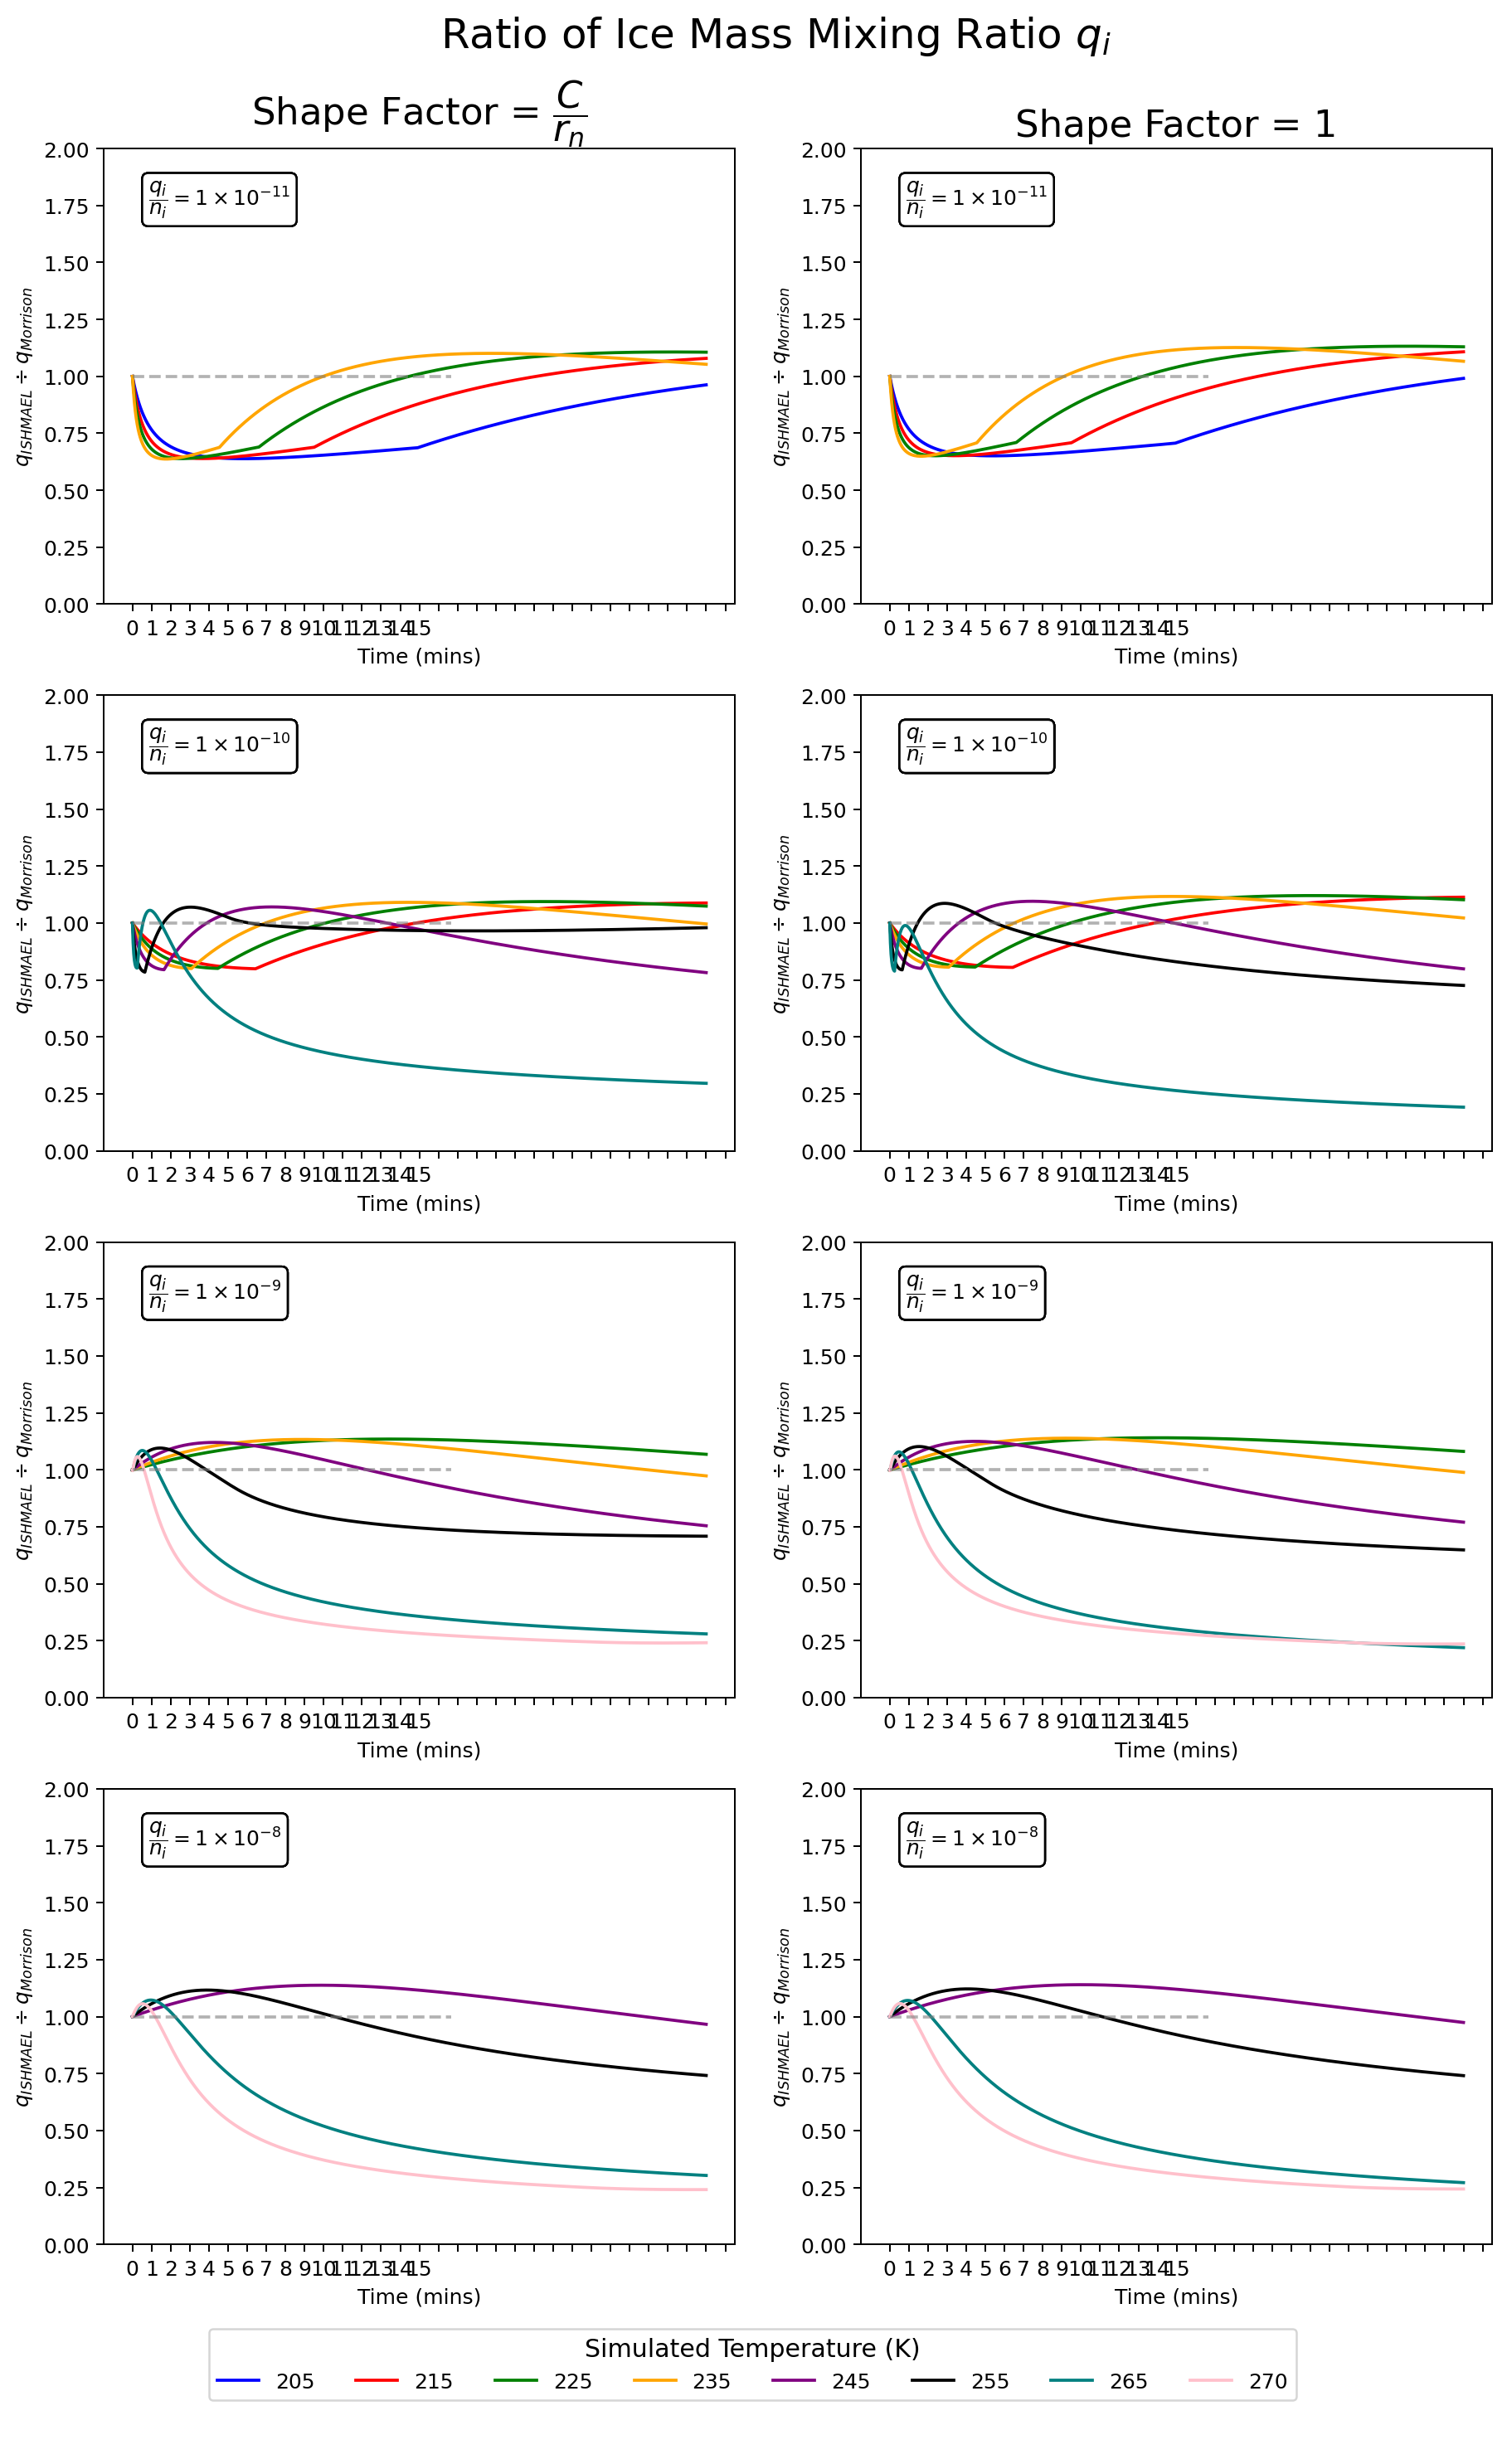

In [28]:
#First plot the relative MMR with and without fs 
fig, ax = plt.subplots(ncols=2, nrows=4,  figsize=(12, 18), dpi=180)

# colorsl = {200:'blue', 210:'red', 220:'green', 230:'orange', 240:'purple', 250:'black', 260:'teal', 270:'pink'}
colorsl = {205:'blue', 215:'red', 225:'green', 235:'orange', 245:'purple', 255:'black', 265:'teal', 270:'pink'}

thislist   = {1e-11:0, 1e-10:1, 1e-9:2, 1e-8:3}
conversion =  {1e-11:'$1\\times 10^{-11}$', 1e-10:'$1\\times 10^{-10}$', 1e-9:'$1\\times 10^{-9}$', 1e-8:'$1\\times 10^{-8}$'}
for ratio_val in thislist.keys():
    for tval in RATIO_DICT_I[ratio_val].keys():
        row = thislist[ratio_val]
        ax[row,0].plot(RATIO_DICT_I[ratio_val][tval]['qi']/(RATIO_DICT_M[ratio_val][tval]['qi']+RATIO_DICT_M[ratio_val][tval]['qs']), c=colorsl[tval])
        ax[row,1].plot(RATIO_DICT_I_NOFS[ratio_val][tval]['qi']/(RATIO_DICT_M[ratio_val][tval]['qi']+RATIO_DICT_M[ratio_val][tval]['qs']), c=colorsl[tval])
        ax[row,0].set_ylim(0, 2.0)
        ax[row,1].set_ylim(0, 2.0)
        ax[row,0].text(50,1.75, '$\dfrac{q_i}{n_i}=$'+str(conversion[ratio_val]), fontsize=10, bbox=dict(boxstyle="round", ec=(0,0,0), fc=(1,1,1)))
        ax[row,1].text(50,1.75, '$\dfrac{q_i}{n_i}=$'+str(conversion[ratio_val]), fontsize=10, bbox=dict(boxstyle="round", ec=(0,0,0), fc=(1,1,1)))

handles, labels = ax[3,0].get_legend_handles_labels() 
#construct lines
linelist = []
for temp in colorsl.keys():
    linelist.append(Line2D([0], [0], label=str(temp), color=colorsl[temp]))
handles.extend(linelist)

fig.subplots_adjust(bottom=0.1)
legend = fig.legend(handles=handles, loc='lower center', bbox_to_anchor=(0.42,0.02), ncol=8, title='Simulated Temperature (K)', fontsize=10)
legend.get_title().set_fontsize('12') #legend 'Title' fontsize


fig.suptitle("Ratio of Ice Mass Mixing Ratio $q_i$", x=0.5, y= 0.93, fontsize=20 )

ax[0,0].set_title("Shape Factor = $\dfrac{C}{r_n}$", fontsize=18)
ax[0,1].set_title("Shape Factor = 1", fontsize=18)

for axis in fig.get_axes():
    axis.set_ylabel('$q_{ISHMAEL} \div q_{Morrison}$')
    axis.set_xlabel('Time (mins)')
    ticks = axis.get_xticks()
    axis.set_xticks(np.arange(0, 2400, 60))
    axis.set_xticklabels(np.arange(0, 16, 1))
    axis.plot(np.linspace(0, 1000, 60), np.linspace(1, 1, 60), c='gray', alpha=0.6, ls='--')
#     axis.set_xlim(0, 900)

    

## Plot the relative PRD with and without fs 

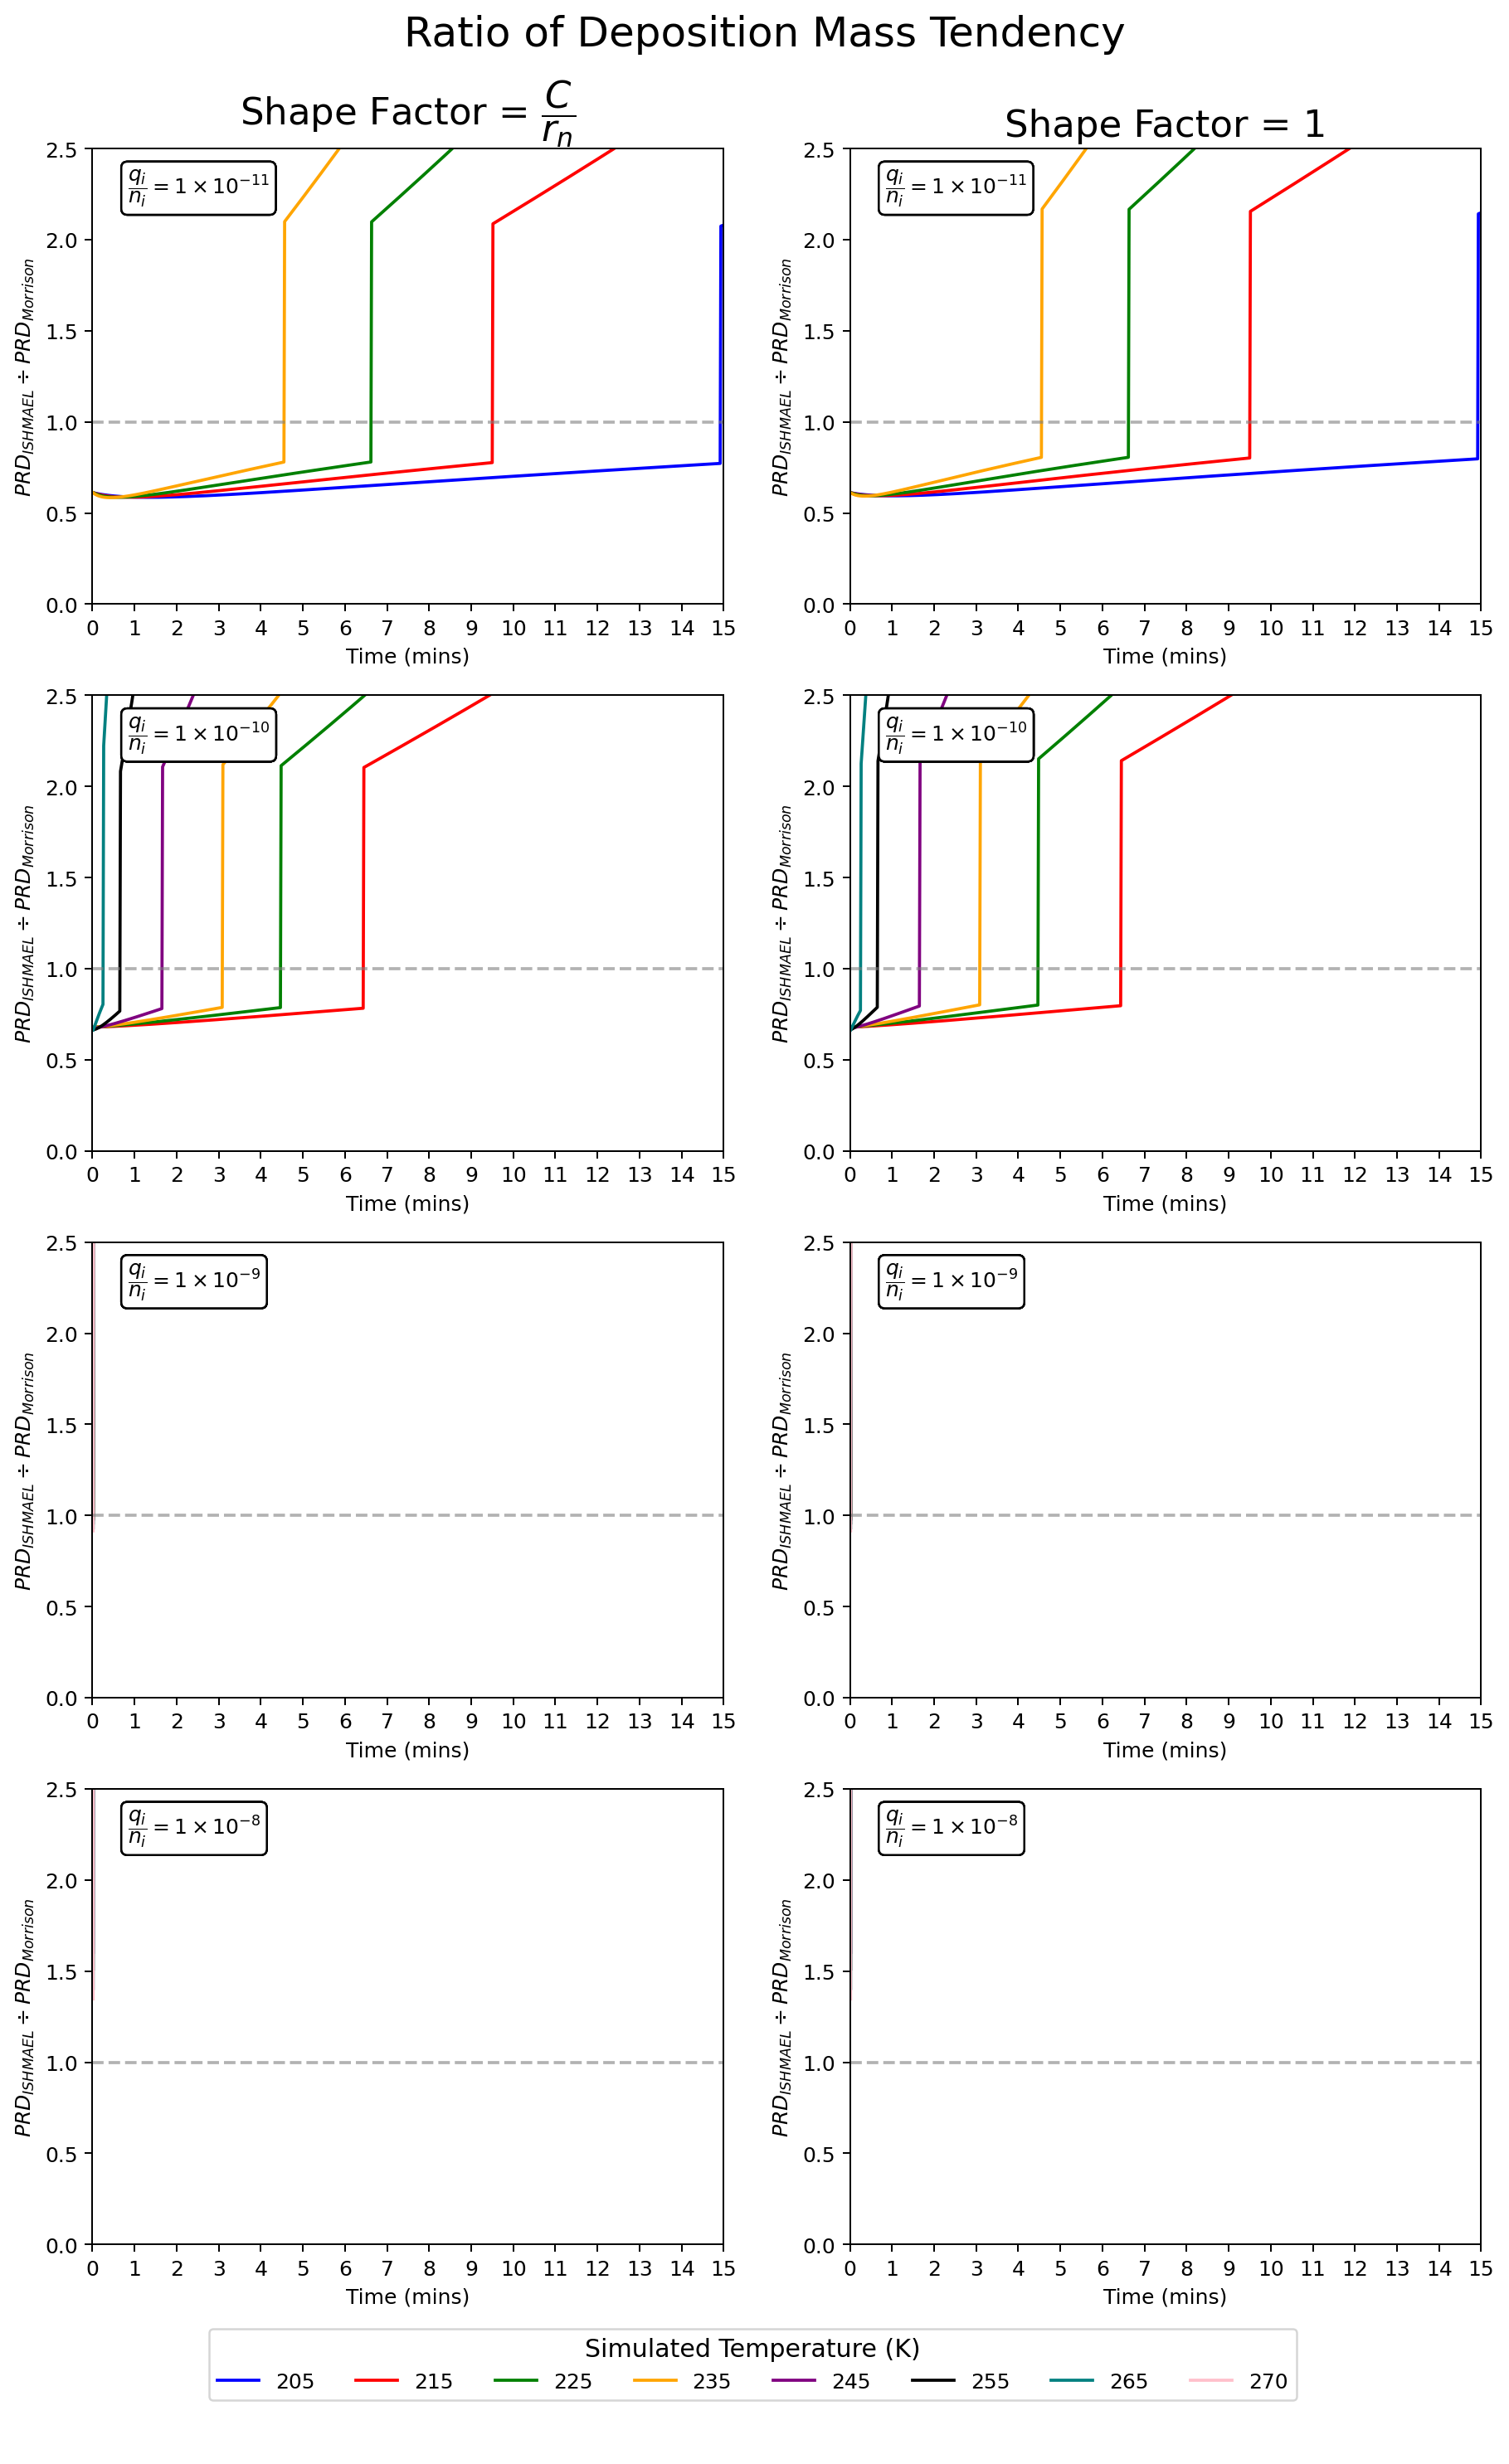

In [30]:
#First plot the relative MMR with and without fs 
fig, ax = plt.subplots(ncols=2, nrows=4,  figsize=(12, 18), dpi=180)

for ratio_val in thislist.keys():
    for tval in RATIO_DICT_I[ratio_val].keys():
        row = thislist[ratio_val]
        ax[row,0].plot(RATIO_DICT_I[ratio_val][tval]['prd']/(RATIO_DICT_M[ratio_val][tval]['prd']), c=colorsl[tval])
        ax[row,1].plot(RATIO_DICT_I_NOFS[ratio_val][tval]['prd']/(RATIO_DICT_M[ratio_val][tval]['prd']), c=colorsl[tval])
        ax[row,0].set_ylim(0, 10.5)
        ax[row,1].set_ylim(0, 10.5)
        ax[row,0].text(50,2.25, '$\dfrac{q_i}{n_i}=$'+str(conversion[ratio_val]), fontsize=10, bbox=dict(boxstyle="round", ec=(0,0,0), fc=(1,1,1)))
        ax[row,1].text(50,2.25, '$\dfrac{q_i}{n_i}=$'+str(conversion[ratio_val]), fontsize=10, bbox=dict(boxstyle="round", ec=(0,0,0), fc=(1,1,1)))

fig.subplots_adjust(bottom=0.1)
legend = fig.legend(handles=handles, loc='lower center', bbox_to_anchor=(0.42,0.02), ncol=8, title='Simulated Temperature (K)', fontsize=10)
legend.get_title().set_fontsize('12') #legend 'Title' fontsize


fig.suptitle("Ratio of Deposition Mass Tendency", x=0.5, y= 0.93, fontsize=20 )

ax[0,0].set_title("Shape Factor = $\dfrac{C}{r_n}$", fontsize=18)
ax[0,1].set_title("Shape Factor = 1", fontsize=18)

for axis in fig.get_axes():
    axis.set_ylabel('$PRD_{ISHMAEL} \div PRD_{Morrison}$')
    axis.set_xlabel('Time (mins)')
    ticks = axis.get_xticks()
    axis.set_xticks(np.arange(0, 1000, 60))
    axis.set_xticklabels(np.arange(0, 16, 1))
    axis.plot(np.linspace(0, 1000, 60), np.linspace(1, 1, 60), c='gray', alpha=0.6, ls='--')
    axis.set_xlim(0, 900)

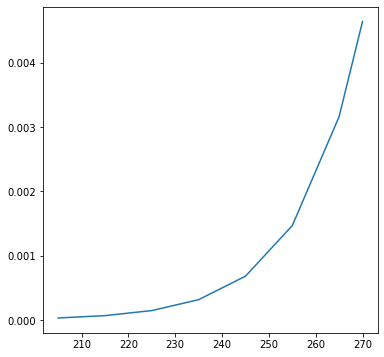

In [17]:
#plot how each saturation level is with temperature

fig, ax = plt.subplots(figsize=(6,6) )

#plot qv vs tval
tvals, qvs = [], []
for tval in colorsl.keys():
    tvals.append(tval)
    try:
        qvs.append(RATIO_DICT_I[1e-11][tval]['QV'][0])
    except:
        qvs.append(RATIO_DICT_I[1e-9][tval]['QV'][0])
        
ax.plot(tvals, qvs)


## plot the number (non relative)

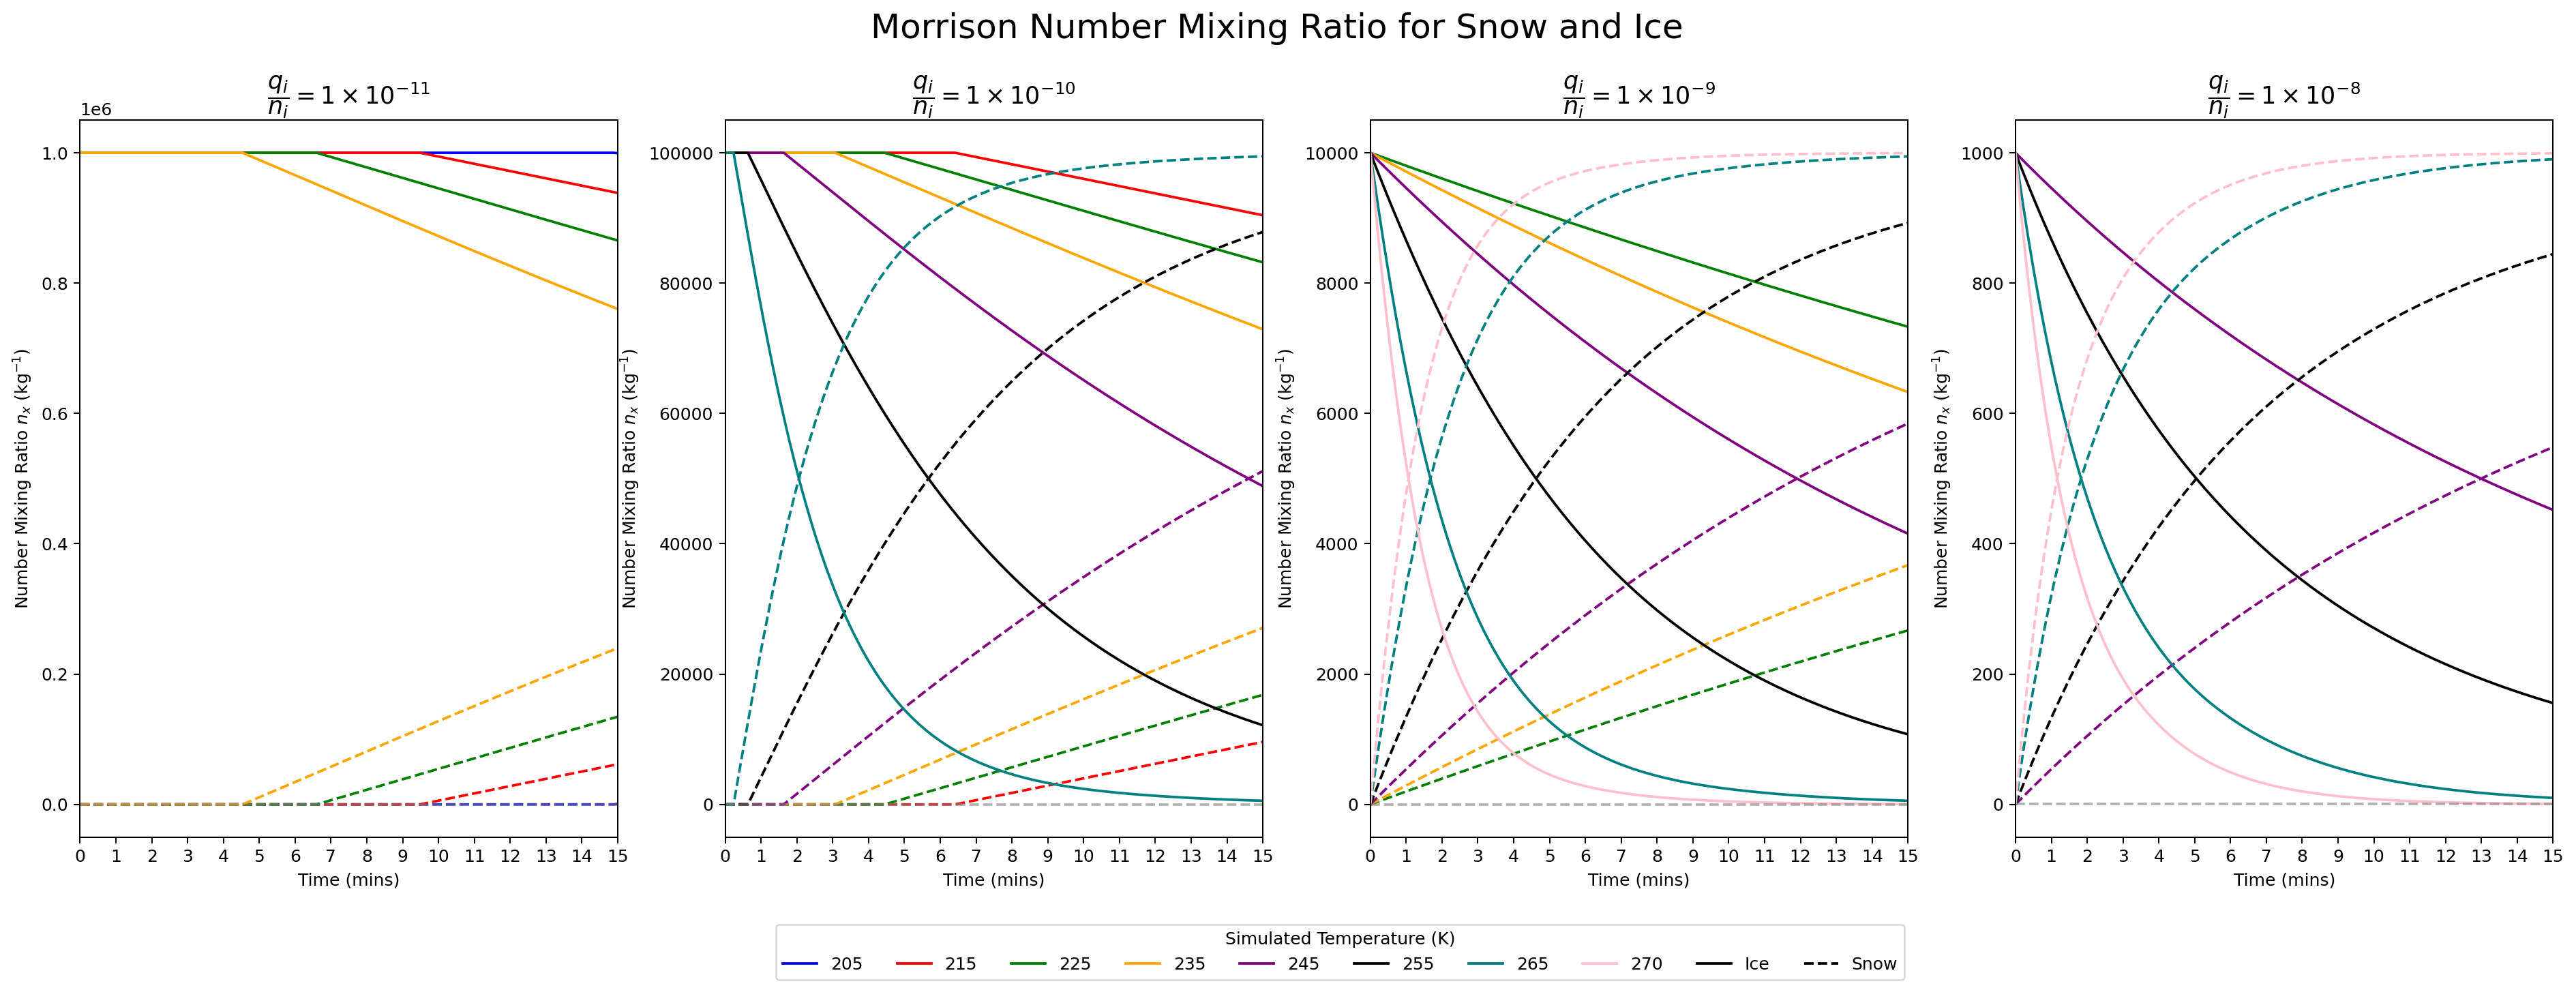

In [18]:
#First plot the relative MMR with and without fs 
fig, ax = plt.subplots(ncols=4,  figsize=(26, 8), dpi=180)

for ratio_val in thislist.keys():
    for tval in RATIO_DICT_I[ratio_val].keys():
        row = thislist[ratio_val]
        ax[row].plot(RATIO_DICT_M[ratio_val][tval]['ni'], c=colorsl[tval])
        ax[row].plot(RATIO_DICT_M[ratio_val][tval]['ns'], c=colorsl[tval], ls='--')
        
#         ax[row,0].set_ylim(0, 2.5)
#         ax[row,1].set_ylim(0, 2.5)
        ax[row].set_title('$\dfrac{q_i}{n_i}=$'+str(conversion[ratio_val]), fontsize=14)
#         ax[row].text(50,2.25, '$\dfrac{q_i}{n_i}=$'+str(conversion[ratio_val]), fontsize=10, bbox=dict(boxstyle="round", ec=(0,0,0), fc=(1,1,1)))

#construct lines
fig.subplots_adjust(bottom=0.15)
linem = Line2D([0], [0], label='Ice', color='k')
linem2 = Line2D([0], [0], label='Snow', color='k', ls = '--')
handles2 = handles.copy()
handles2.extend([linem, linem2])
legend_mixed = fig.legend(handles=handles2, loc='lower center', bbox_to_anchor=(0.42, -0.0), ncol=10, title='Simulated Temperature (K)', fontsize=10)
legend.get_title().set_fontsize('12') #legend 'Title' fontsize


fig.suptitle("Morrison Number Mixing Ratio for Snow and Ice", x=0.5, y= 0.99, fontsize=20 )

# ax[0,0].set_title("Shape Factor = $\dfrac{C}{r_n}$", fontsize=18)
# ax[0,1].set_title("Shape Factor = 1", fontsize=18)

for axis in fig.get_axes():
    axis.set_ylabel('Number Mixing Ratio $n_x$ (kg$^{-1}$)')
    axis.set_xlabel('Time (mins)')
    ticks = axis.get_xticks()
    axis.set_xticks(np.arange(0, 1000, 60))
    axis.set_xticklabels(np.arange(0, 16, 1))
    axis.plot(np.linspace(0, 1000, 60), np.linspace(1, 1, 60), c='gray', alpha=0.6, ls='--')
    axis.set_xlim(0, 900)
#     axis.set_yscale('log')
#     axis.set_ylim(0, 1e7)
    

## Show Aspect Ratio

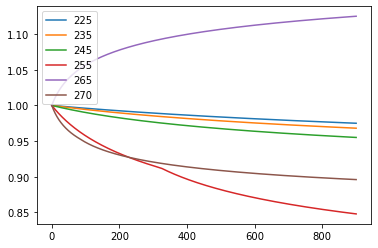

In [19]:
#investigate the rnf and anf tmp as output from ish deposition

for tav in RATIO_DICT_I[1e-9].keys():
    plt.plot(RATIO_DICT_I[1e-9][tav]['deltastr'], label=tav)
    
plt.legend()


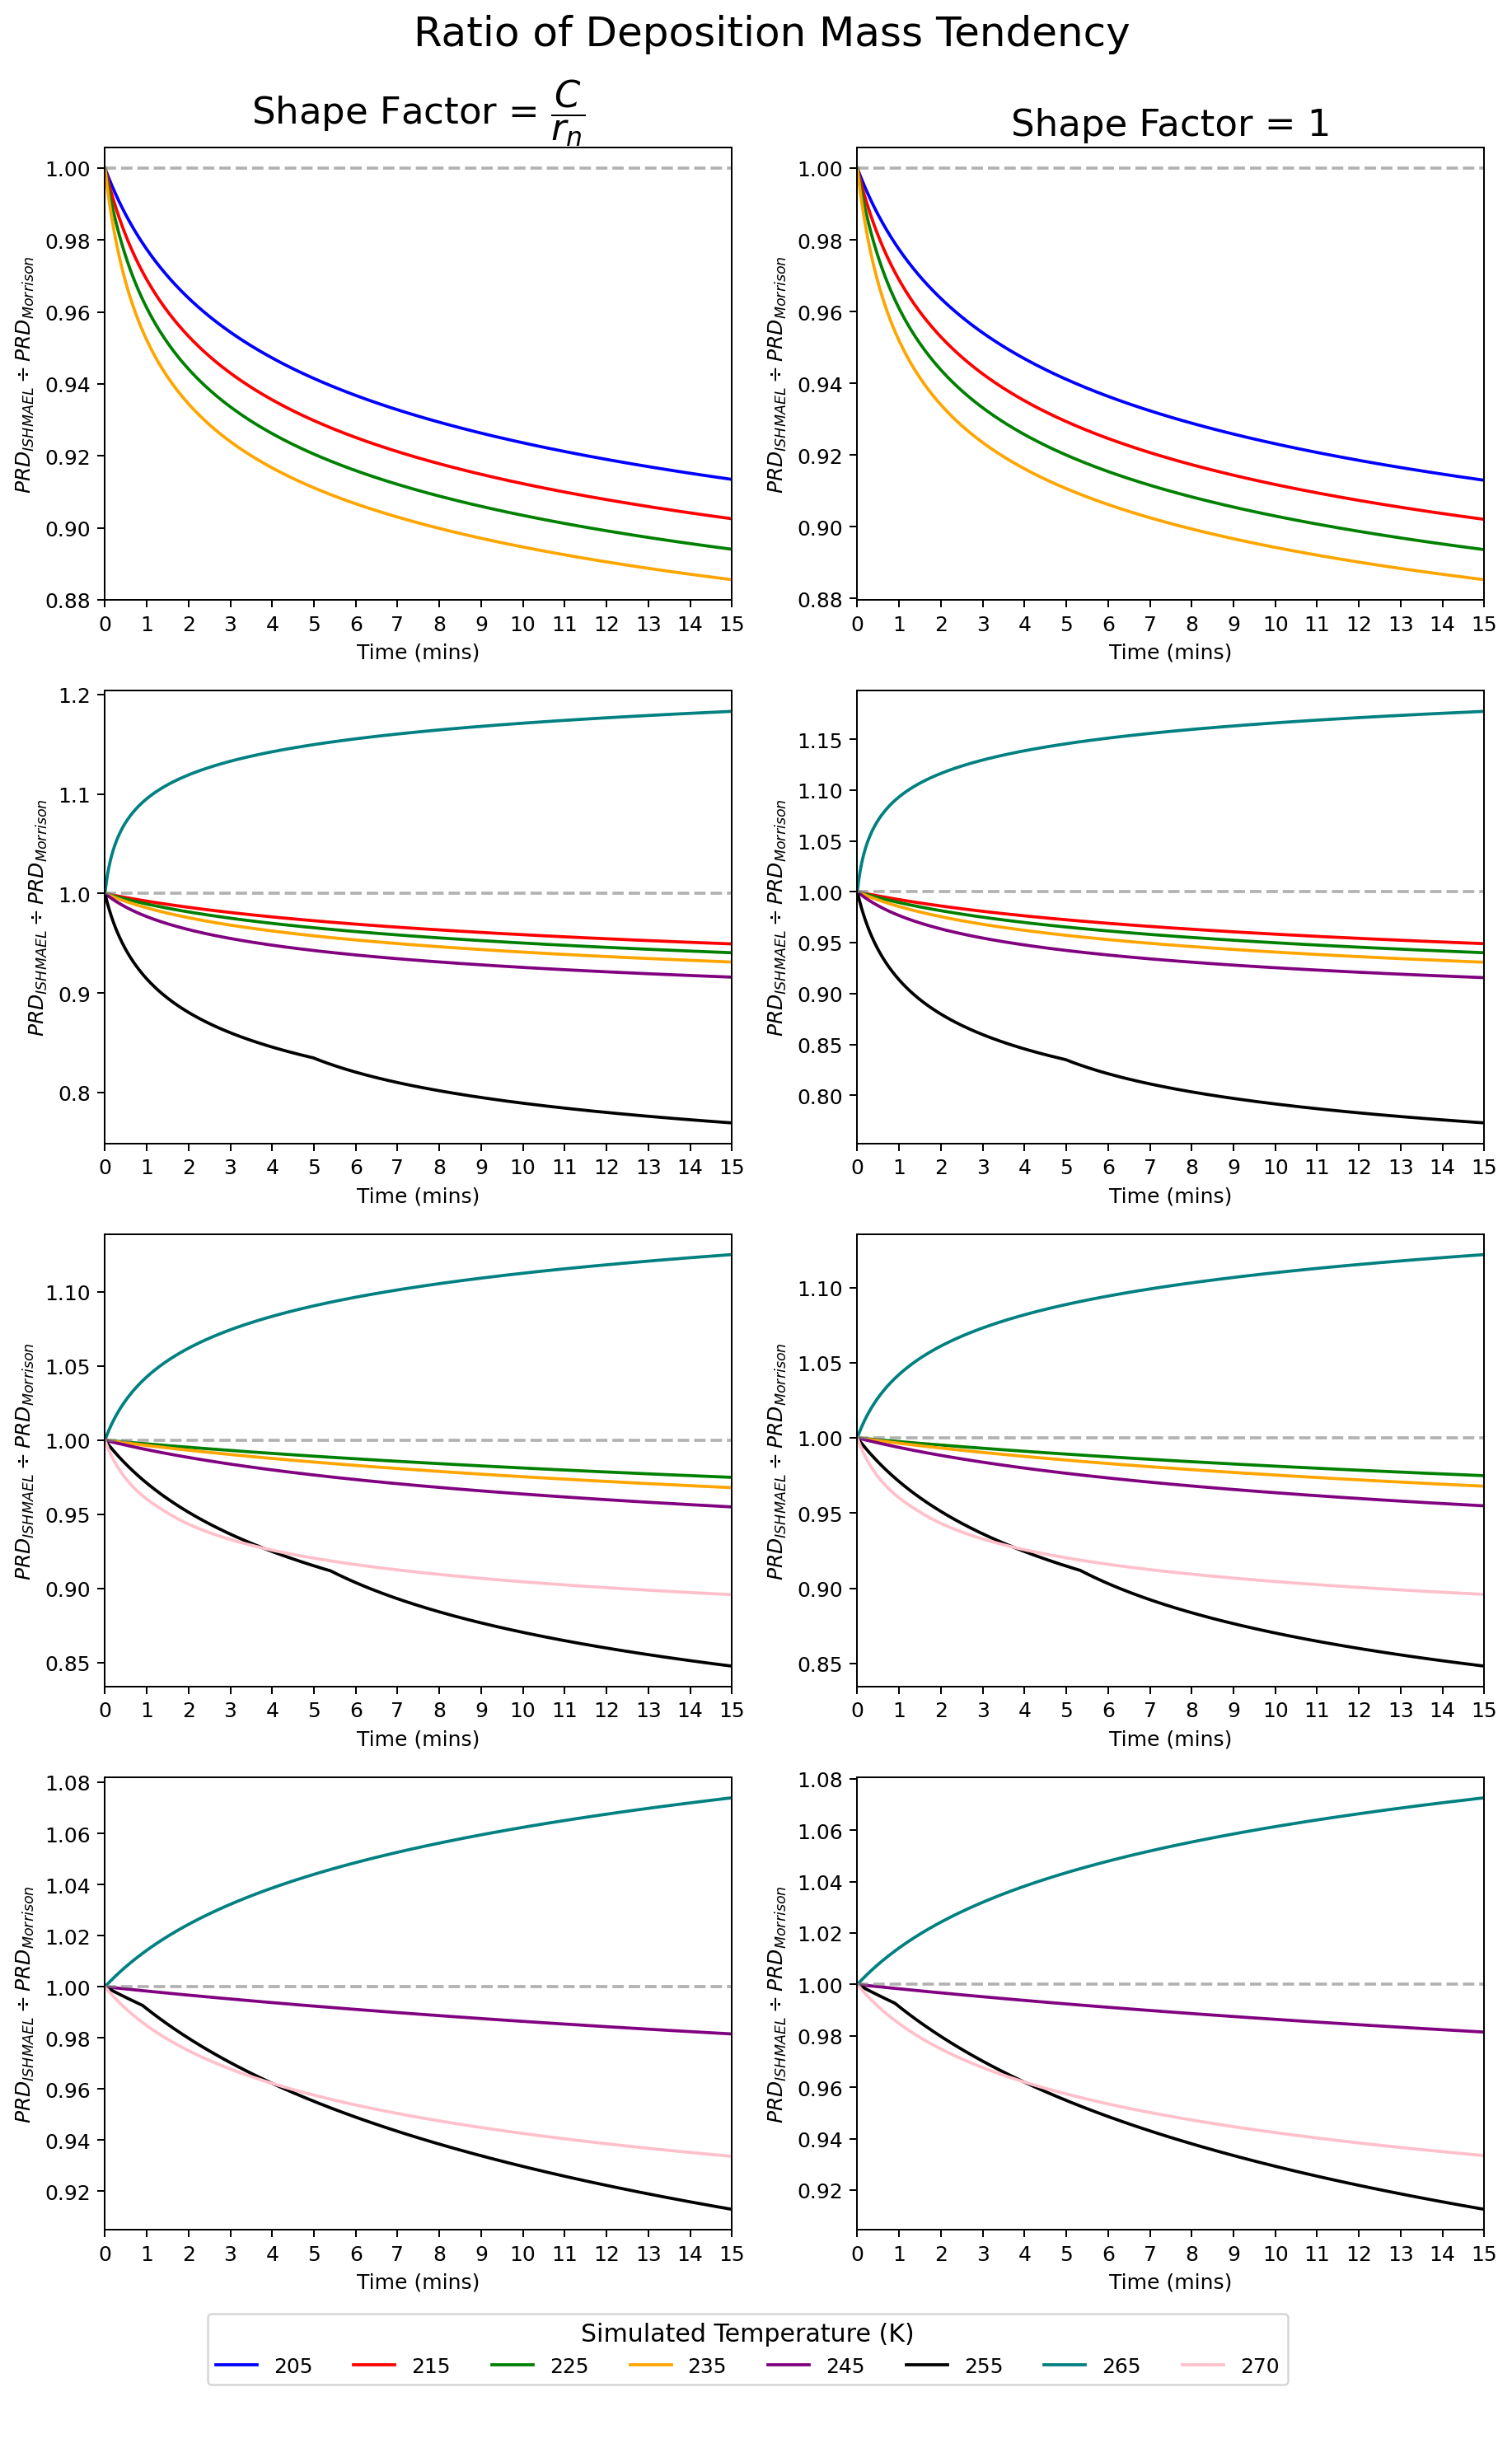

In [20]:
fig, ax = plt.subplots(ncols=2, nrows=4,  figsize=(12, 18), dpi=180)

for ratio_val in thislist.keys():
    for tval in RATIO_DICT_I[ratio_val].keys():
        row = thislist[ratio_val]
        ax[row,0].plot(RATIO_DICT_I[ratio_val][tval]['deltastr'], c=colorsl[tval])
        ax[row,1].plot(RATIO_DICT_I_NOFS[ratio_val][tval]['deltastr'], c=colorsl[tval])
#         ax[row,0].set_ylim(0, 2.5)
#         ax[row,1].set_ylim(0, 2.5)
#         ax[row,0].text(50,2.25, '$\dfrac{q_i}{n_i}=$'+str(conversion[ratio_val]), fontsize=10, bbox=dict(boxstyle="round", ec=(0,0,0), fc=(1,1,1)))
#         ax[row,1].text(50,2.25, '$\dfrac{q_i}{n_i}=$'+str(conversion[ratio_val]), fontsize=10, bbox=dict(boxstyle="round", ec=(0,0,0), fc=(1,1,1)))

fig.subplots_adjust(bottom=0.1)
legend = fig.legend(handles=handles, loc='lower center', bbox_to_anchor=(0.42,0.02), ncol=8, title='Simulated Temperature (K)', fontsize=10)
legend.get_title().set_fontsize('12') #legend 'Title' fontsize


fig.suptitle("Ratio of Deposition Mass Tendency", x=0.5, y= 0.93, fontsize=20 )

ax[0,0].set_title("Shape Factor = $\dfrac{C}{r_n}$", fontsize=18)
ax[0,1].set_title("Shape Factor = 1", fontsize=18)

for axis in fig.get_axes():
    axis.set_ylabel('$PRD_{ISHMAEL} \div PRD_{Morrison}$')
    axis.set_xlabel('Time (mins)')
    ticks = axis.get_xticks()
    axis.set_xticks(np.arange(0, 1000, 60))
    axis.set_xticklabels(np.arange(0, 16, 1))
    axis.plot(np.linspace(0, 1000, 60), np.linspace(1, 1, 60), c='gray', alpha=0.6, ls='--')
    axis.set_xlim(0, 900)

KeyError: 0

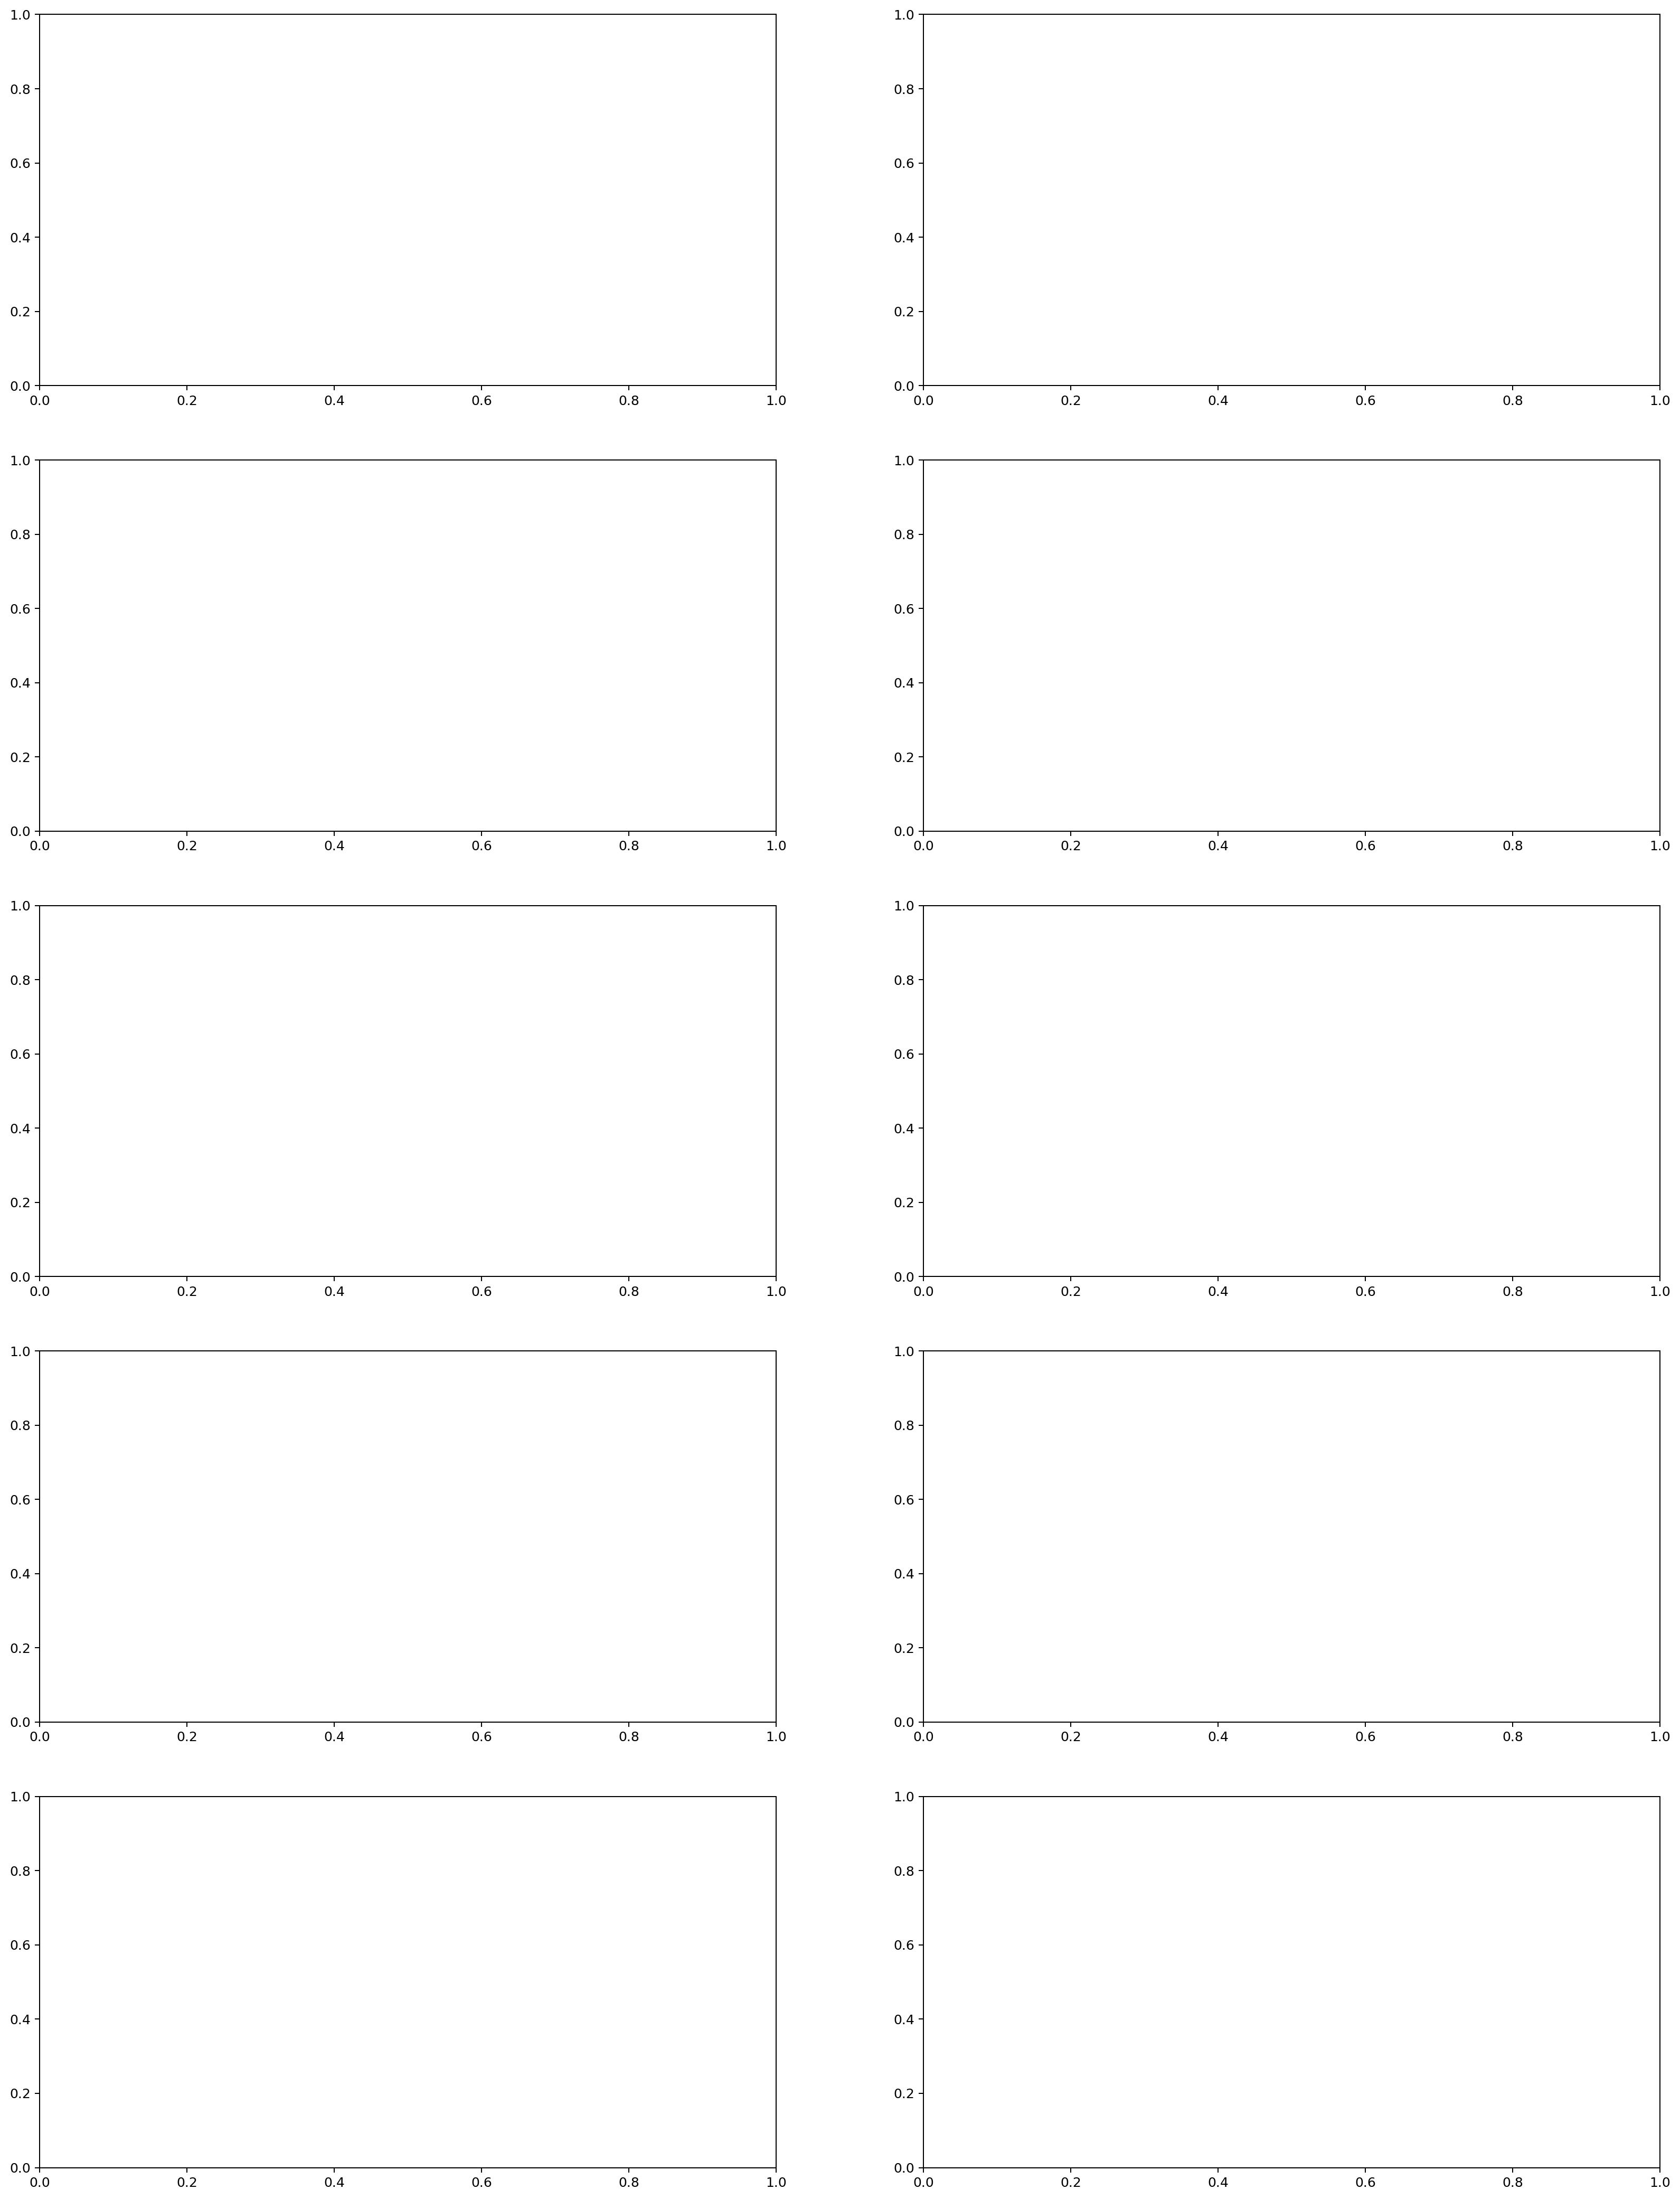

In [21]:
fig, ax = plt.subplots(ncols=2, nrows=5,  figsize=(22, 30), dpi=180)

#MMR specific

tick=0
for tval in outdict_M.keys():
    ax[0,0].plot(outdict_I[tval]['qi']/(outdict_M[tval]['qi']+outdict_M[tval]['qs']), c=colorsl[tick])
#     ax[0,0].plot(outdict_M[tval]['qi'], c=colorsl[tick], ls='--')
#     ax[0,0].plot(outdict_M[tval]['qs'], c=colorsl[tick], ls=':')
    tick+=1

tick=0
for tval in outdict_M.keys():
    ax[0,1].plot(outdict_I[tval]['ni'], c=colorsl[tick])
    ax[0,1].plot(outdict_M[tval]['ni'], c=colorsl[tick], ls='--')
    ax[0,1].plot(outdict_M[tval]['ns'], c=colorsl[tick], ls=':')
    tick+=1

tick=0
for tval in outdict_M.keys():
    ax[1,0].plot(outdict_I[tval]['QV']/outdict_M[tval]['QV'], c=colorsl[tick])
    tick+=1


tick=0
for tval in outdict_M.keys():
    ax[1,1].plot(outdict_I[tval]['prd']/(outdict_M[tval]['prd']+outdict_M[tval]['prds']), c=colorsl[tick])
    tick+=1


tick=0
for tval in outdict_M.keys():
    ax[2,0].plot(outdict_I[tval]['capacitance']/outdict_M[tval]['capacitance'], c=colorsl[tick])
    tick+=1

tick=0
for tval in outdict_M.keys():
    ax[2,1].plot(outdict_I[tval]['sat_i']/outdict_M[tval]['sat_i'], c=colorsl[tick])
    tick+=1

tick=0
for tval in outdict_M.keys():
    labstring = str(tval)+' K'
    ax[3,0].plot(outdict_I[tval]['r_av']/outdict_M[tval]['r_av'], c=colorsl[tick], label=labstring)
    ax[3,0].plot(outdict_M[tval]['r_av_s'], c=colorsl[tick], ls=':')
    tick+=1
    
tick=0
for tval in outdict_M.keys():
    ax[3,1].plot(outdict_I[tval]['afn'], c=colorsl[tick])
    tick+=1


tick=0
for tval in outdict_M.keys():
    ax[4,0].plot(outdict_I[tval]['shape_factor'], c=colorsl[tick])
    tick+=1


tick=0
for tval in outdict_M.keys():
    ax[4,1].plot(outdict_I[tval]['AR'], c=colorsl[tick])
    tick+=1
    
    
fig.subplots_adjust(top=0.95)

handles, labels = ax[3,0].get_legend_handles_labels() 
linei = Line2D([0], [0], label='ISHMAEL', color='k')
linem = Line2D([0], [0], label='Morrison (ICE)', color='k', ls = '--')
linem2 = Line2D([0], [0], label='Morrison (SNOW)', color='k', ls = ':')
handles.extend([linei, linem, linem2])

fig.legend(handles=handles, loc='lower center', bbox_to_anchor=(0.4,0.846), ncol=10)

for axis in fig.get_axes():
    axis.set_xlabel('time (minutes)')
    ticks = axis.get_xticks()
    axis.set_xticks(np.arange(0, 1000, 60))
    axis.set_xticklabels(np.arange(0, 16, 1))

fig.suptitle('$q_i / n_i$ ='+OPT+'(kg)', fontsize=30)

ax[0,0].set_ylabel('Relative Mass Mixing Ratio ', fontsize=18)
ax[0,1].set_ylabel('Number Mixing Ratio (kg$^{-1}$)', fontsize=18)
ax[1,0].set_ylabel('Relative Vapor Mixing Ratio ', fontsize=18)
ax[1,1].set_ylabel('Relative Deposition Mass Tendency ', fontsize=18)
ax[2,0].set_ylabel('Relative Capacitance ', fontsize=18) 
ax[2,1].set_ylabel('Relative Saturation Ratio over ice ', fontsize=18)
ax[3,0].set_ylabel('Relative Average Radius  ', fontsize=18)
ax[3,1].set_ylabel('AFN factor (kg m$^{-1}$)', fontsize=18)
ax[4,0].set_ylabel('Shape factor ($f_s$)', fontsize=18)
ax[4,1].set_ylabel('Aspect Ratio $\phi$', fontsize=18)


# ax[0].set_xlabel('timestep')
# ax[1].set_xlabel('timestep')
# ax[2].set_xlabel('timestep')

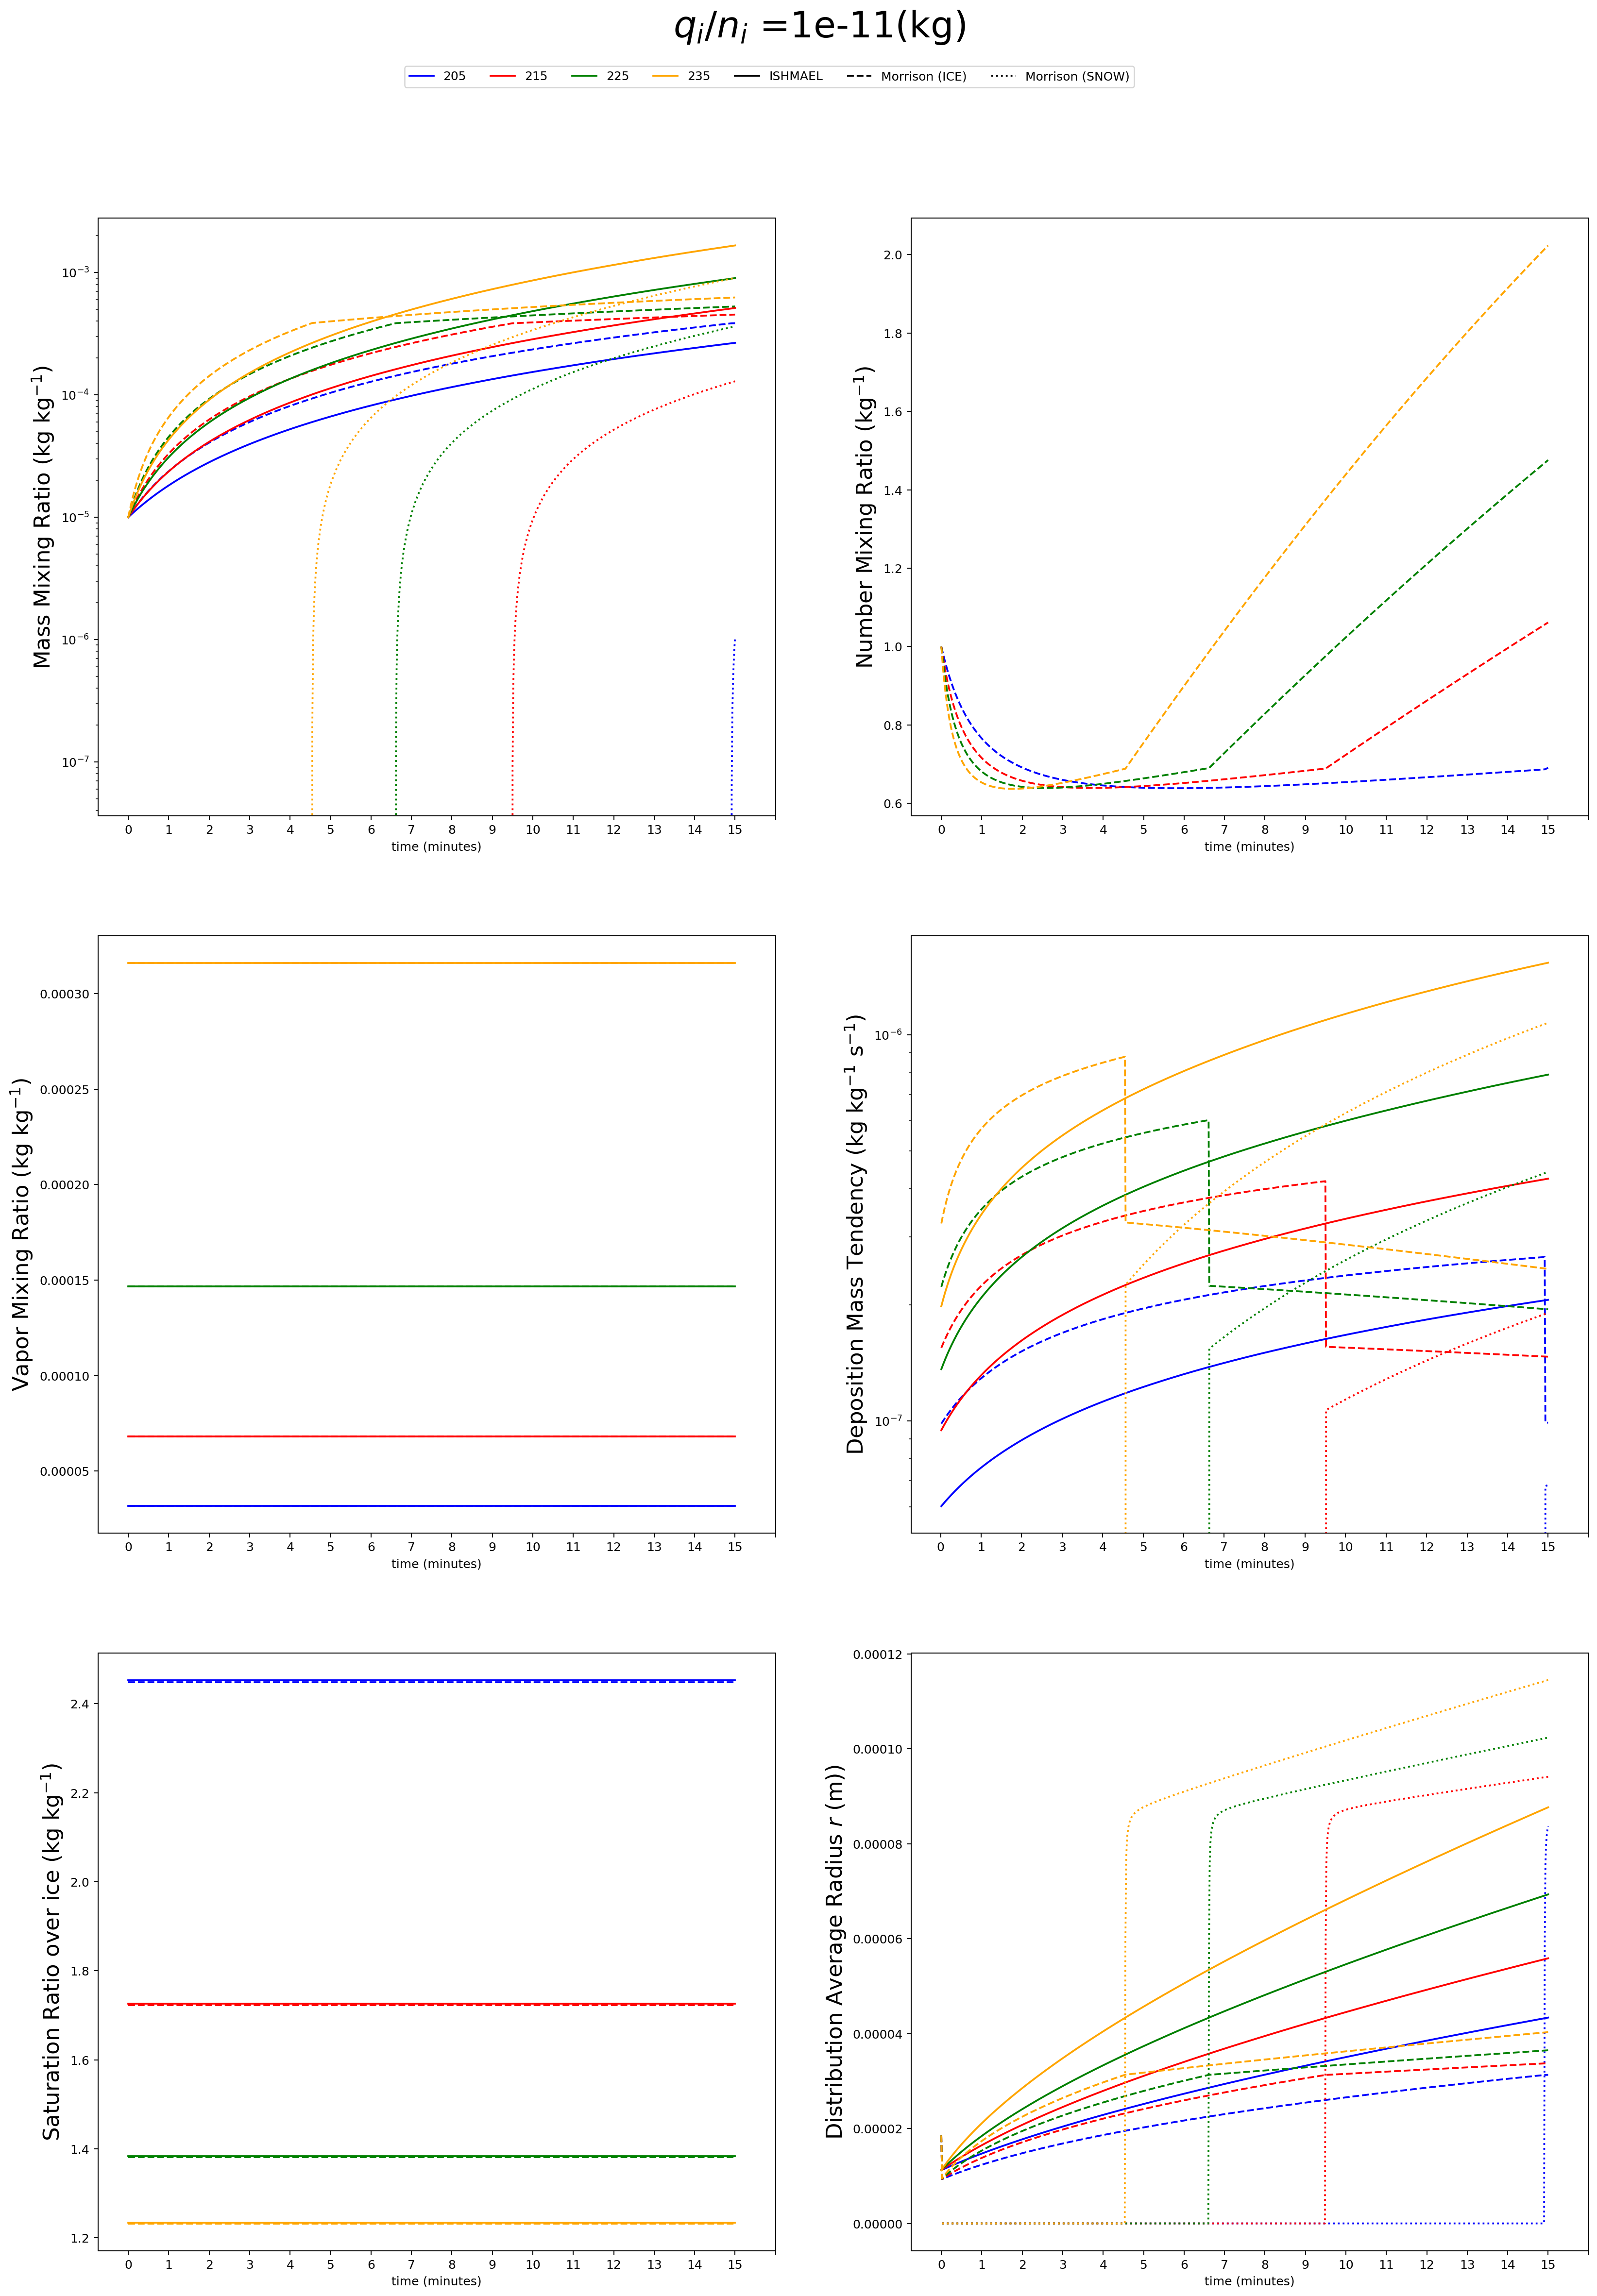

In [24]:
#as above but not ratio

fig, ax = plt.subplots(ncols=2, nrows=3,  figsize=(22, 30), dpi=180)

#MMR specific
RATIO=1e-11
for tval in RATIO_DICT_I[RATIO].keys():
        ax[0,0].plot(RATIO_DICT_I[RATIO][tval]['qi'], c=colorsl[tval], label=tval)
        ax[0,0].plot(RATIO_DICT_M[RATIO][tval]['qi'], c=colorsl[tval], ls='--')
        ax[0,0].plot(RATIO_DICT_M[RATIO][tval]['qs'], c=colorsl[tval], ls=':')
        
        #TEMP plot the qi/ni evolution
#         ax[0,1].plot(RATIO_DICT_I[1e-11][tval]['ni'], c=colorsl[tval])
#         ax[0,1].plot(RATIO_DICT_M[1e-11][tval]['ni'], c=colorsl[tval], ls='--')
#         ax[0,1].plot(RATIO_DICT_M[1e-11][tval]['ns'], c=colorsl[tval], ls=':')
#         ax[0,1].plot(RATIO_DICT_I[RATIO][tval]['qi']/RATIO_DICT_I[RATIO][tval]['ni'], c=colorsl[tval])
        ax[0,1].plot((RATIO_DICT_I[RATIO][tval]['qi']/RATIO_DICT_I[RATIO][tval]['ni'])/((RATIO_DICT_M[RATIO][tval]['qi'])/RATIO_DICT_M[RATIO][tval]['ni']), c=colorsl[tval], ls='--')
#         ax[0,1].plot(RATIO_DICT_M[1e-11][tval]['qs']/RATIO_DICT_M[1e-11][tval]['ns'], c=colorsl[tval], ls=':')
        
        ax[1,0].plot(RATIO_DICT_I[RATIO][tval]['QV'], c=colorsl[tval])
        ax[1,0].plot(RATIO_DICT_M[RATIO][tval]['QV'], c=colorsl[tval], ls='--')
        
        ax[1,1].plot(RATIO_DICT_I[RATIO][tval]['prd'], c=colorsl[tval])
        ax[1,1].plot(RATIO_DICT_M[RATIO][tval]['prd'], c=colorsl[tval], ls='--')
        ax[1,1].plot(RATIO_DICT_M[RATIO][tval]['prds'], c=colorsl[tval], ls=':')
        
        ax[2,0].plot(RATIO_DICT_I[RATIO][tval]['sat_i'], c=colorsl[tval])
        ax[2,0].plot(RATIO_DICT_M[RATIO][tval]['sat_i'], c=colorsl[tval], ls='--')
        
        ax[2,1].plot(RATIO_DICT_I[RATIO][tval]['r_av'], c=colorsl[tval])
        ax[2,1].plot(RATIO_DICT_M[RATIO][tval]['r_av'], c=colorsl[tval], ls='--')
        ax[2,1].plot(RATIO_DICT_M[RATIO][tval]['r_av_s'], c=colorsl[tval], ls=':')

    
fig.subplots_adjust(top=0.90)

handles, labels = ax[0,0].get_legend_handles_labels() 
linei = Line2D([0], [0], label='ISHMAEL', color='k')
linem = Line2D([0], [0], label='Morrison (ICE)', color='k', ls = '--')
linem2 = Line2D([0], [0], label='Morrison (SNOW)', color='k', ls = ':')
handles.extend([linei, linem, linem2])

fig.legend(handles=handles, loc='lower center', bbox_to_anchor=(0.4,0.840), ncol=10)

# ax[0,0].set_yscale('log')

for axis in fig.get_axes():
    axis.set_xlabel('time (minutes)')
    ticks = axis.get_xticks()
    axis.set_xticks(np.arange(0, 1000, 60))
    axis.set_xticklabels(np.arange(0, 16, 1))

fig.suptitle('$q_i / n_i$ ='+str(RATIO)+'(kg)', fontsize=30)

ax[0,0].set_ylabel('Mass Mixing Ratio (kg kg$^{-1}$)', fontsize=18)
ax[0,1].set_ylabel('Number Mixing Ratio (kg$^{-1}$)', fontsize=18)
ax[1,0].set_ylabel('Vapor Mixing Ratio (kg kg$^{-1}$)', fontsize=18)
ax[1,1].set_ylabel('Deposition Mass Tendency (kg kg$^{-1}$ s$^{-1}$)', fontsize=18)
ax[2,1].set_ylabel('Distribution Average Radius $r$ (m))', fontsize=18) 
ax[2,0].set_ylabel('Saturation Ratio over ice (kg kg$^{-1}$)', fontsize=18)
# ax[3,0].set_ylabel('Distribution Average Radius $r$ (m))', fontsize=18)
# ax[3,1].set_ylabel('AFN factor (kg m$^{-1}$)', fontsize=18)
# ax[4,0].set_ylabel('Shape factor ($f_s$)', fontsize=18)
# ax[4,1].set_ylabel('Aspect Ratio $\phi$', fontsize=18)

ax[1,1].set_yscale('log')
ax[0,0].set_yscale('log')

# ax[0,0].set_ylim(1e-8, 1e-4)
# ax[1,1].set_ylim(1e-11, 1e-7)

245
4.0129545969218886e-09
4.522886258457107e-09

255
9.728431066875828e-09
1.21478217760466e-08

265
2.4846406332442512e-08
3.0605483934618225e-08

270
3.738449406046025e-08
5.104405037316087e-08



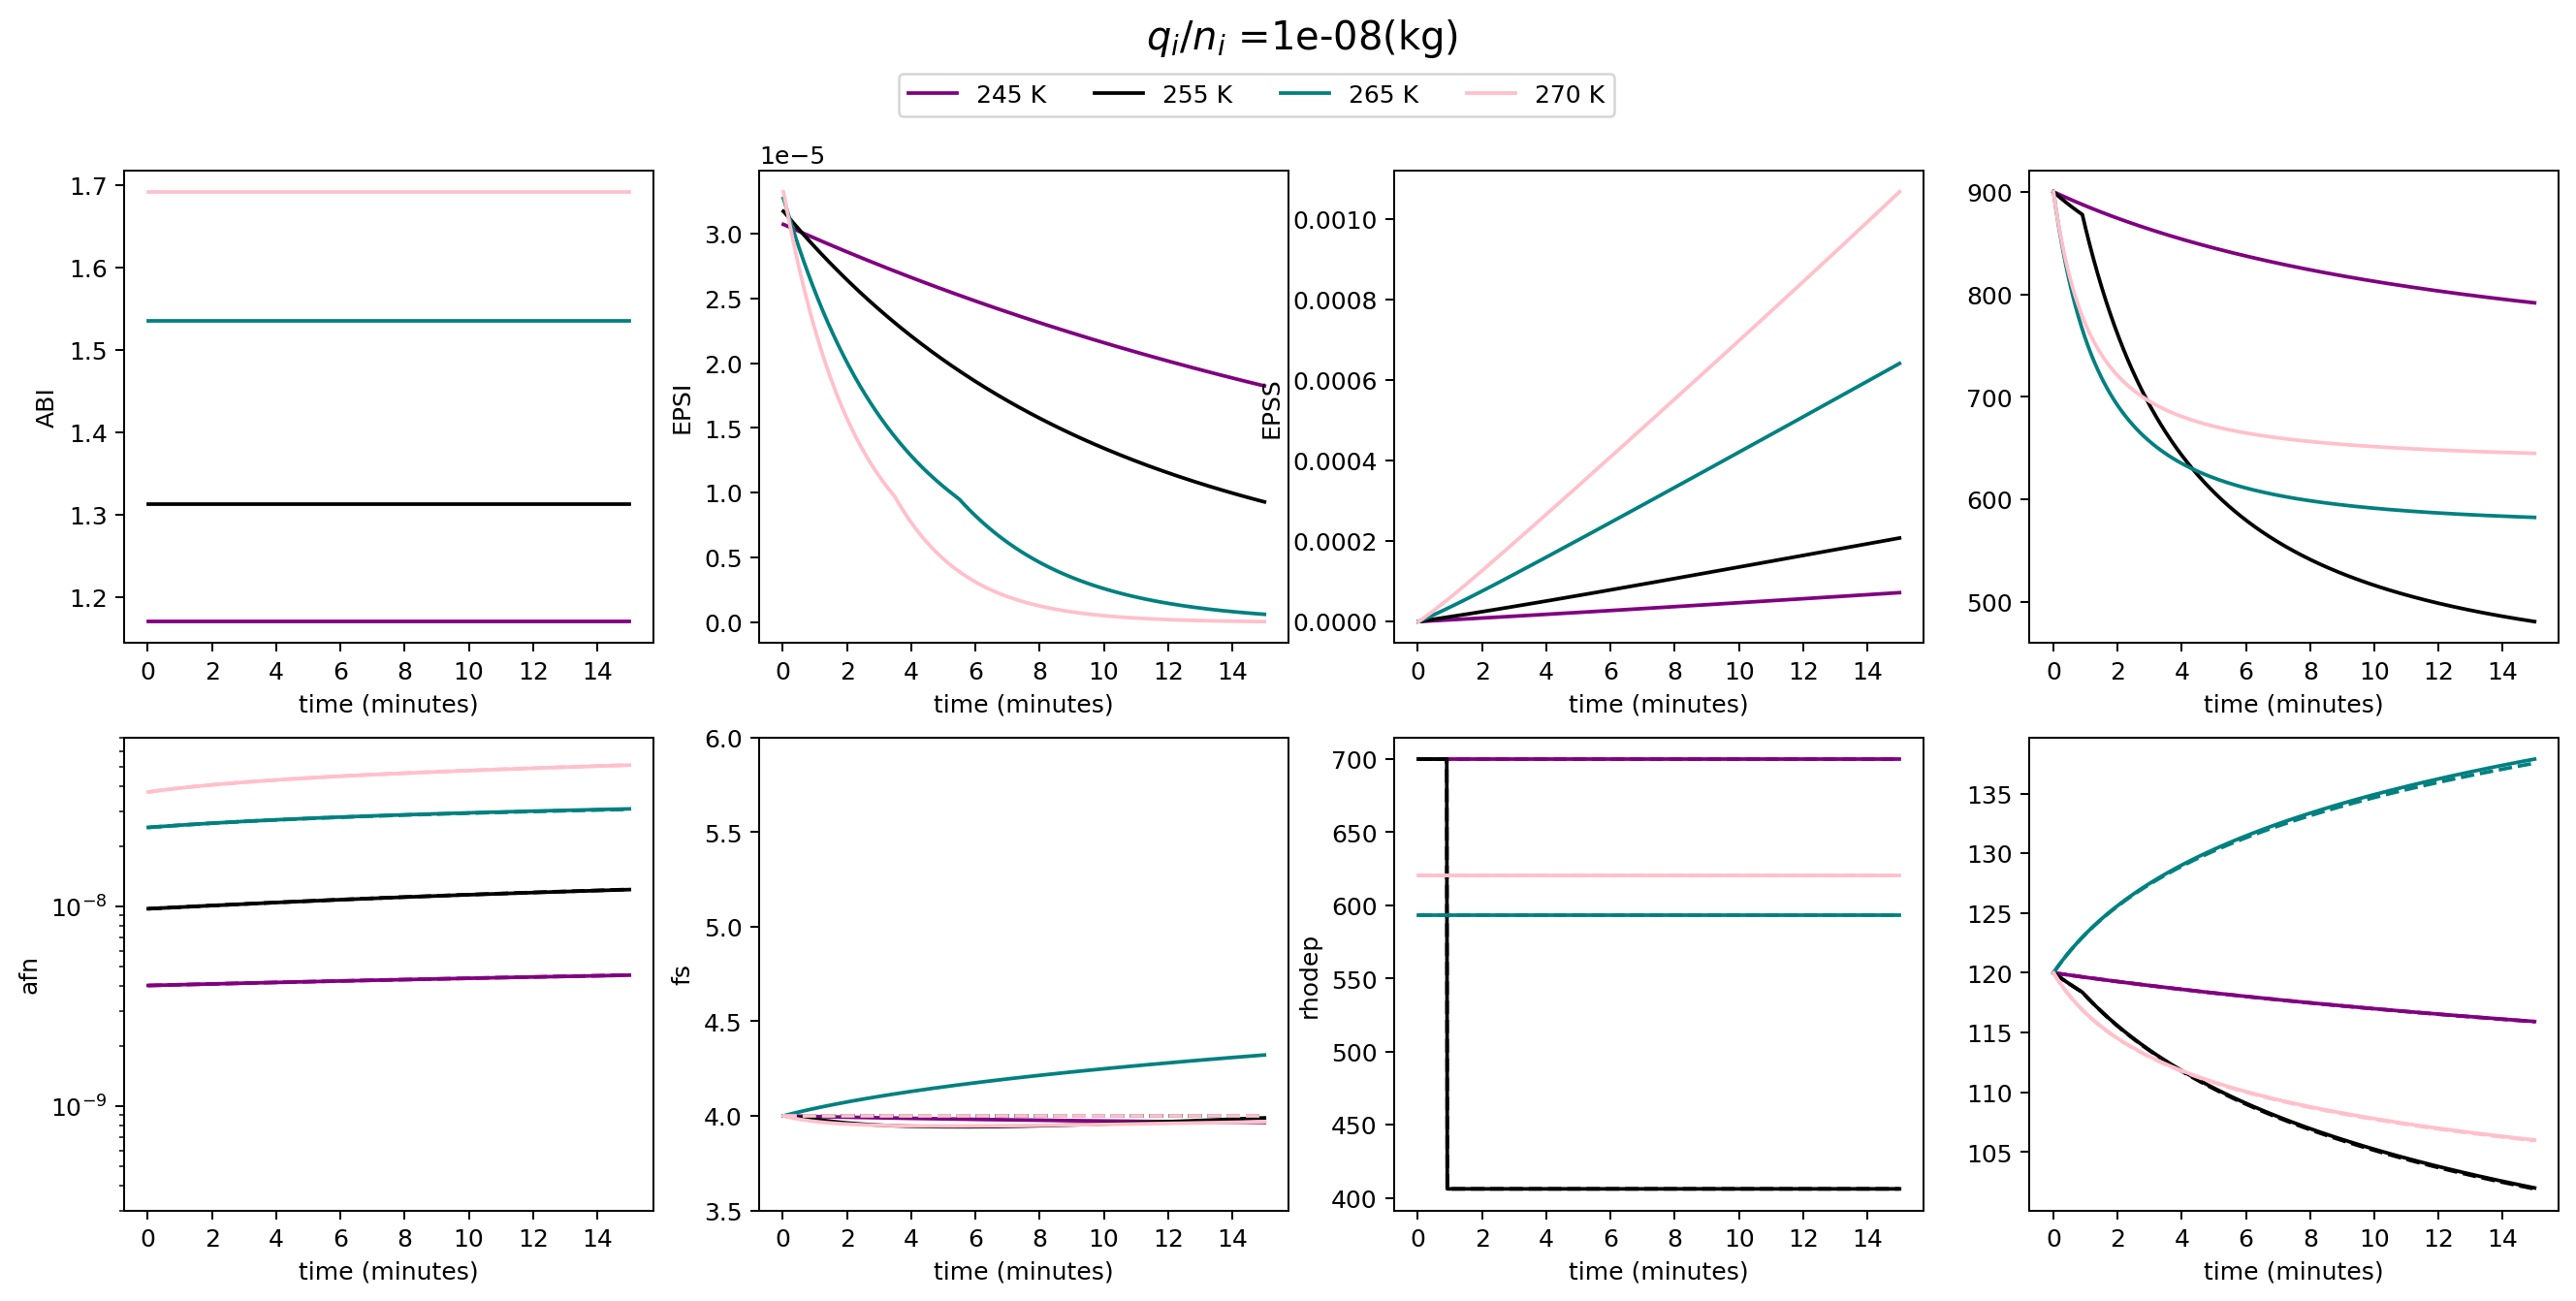

In [23]:
#plot the capacitance specific variables from each scheme

fig, ax = plt.subplots(ncols=4, nrows=2, figsize=(18, 8), dpi=180)

#ABI, EPSS, EPSI
tick=0
ratio_val = 1e-8
for tval in RATIO_DICT_M[ratio_val].keys():
    #ax 0,0 ABI
    ax[0,0].plot(RATIO_DICT_M[ratio_val][tval]['ABI'],  c=colorsl[tval])
    ax[0,1].plot(RATIO_DICT_M[ratio_val][tval]['EPSI'], c=colorsl[tval])
    ax[0,2].plot(RATIO_DICT_M[ratio_val][tval]['EPSS'], c=colorsl[tval])
    tick+=1
    
#AFN, FS, RHODEP
tick=0
for tval in RATIO_DICT_I[ratio_val].keys():
    #tmp plot 'rhobar' to ax 0,3
    ax[0,3].plot(RATIO_DICT_I[ratio_val][tval]['rhobar'],  c=colorsl[tval] )
    #ax 0,0 ABI
    ax[1,0].plot(RATIO_DICT_I[ratio_val][tval]['afn'],  c=colorsl[tval], label= str(tval)+' K')
    ax[1,1].plot(RATIO_DICT_I[ratio_val][tval]['shape_factor'], c=colorsl[tval])
    ax[1,2].plot(RATIO_DICT_I[ratio_val][tval]['rhodep'], c=colorsl[tval])
    gam = [gamma(6 +i)/6 for i in RATIO_DICT_I[ratio_val][tval]['deltastr']]
    ax[1,3].plot(gam, c=colorsl[tval] )
    
    ax[1,0].plot(RATIO_DICT_I_NOFS[ratio_val][tval]['afn'],  c=colorsl[tval], ls='--')
    ax[1,1].plot(RATIO_DICT_I_NOFS[ratio_val][tval]['shape_factor'], c=colorsl[tval], ls='--')
    ax[1,2].plot(RATIO_DICT_I_NOFS[ratio_val][tval]['rhodep'], c=colorsl[tval], ls='--')
    gam = [gamma(6 +i)/6 for i in RATIO_DICT_I_NOFS[ratio_val][tval]['deltastr']]
    ax[1,3].plot(gam, c=colorsl[tval], ls='--')
    tick+=1
    
ax[0,0].set_ylabel('ABI'), ax[0,1].set_ylabel('EPSI'), ax[0,2].set_ylabel('EPSS')
ax[1,0].set_ylabel('afn'), ax[1,1].set_ylabel('fs'), ax[1,2].set_ylabel('rhodep')

fig.subplots_adjust(top=0.87)
handles, labels = ax[1,0].get_legend_handles_labels() 

fig.legend(handles=handles, loc='lower center', bbox_to_anchor=(0.4,0.840), ncol=10)
ax[1,0].set_yscale('log')
ax[1,1].set_ylim(3.5, 6)
ax[1,0].set_ylim(3e-10, 7e-8)


for axis in fig.get_axes():
    axis.set_xlabel('time (minutes)')
    ticks = axis.get_xticks()
    axis.set_xticks(np.arange(0, 960, 120))
    axis.set_xticklabels(np.arange(0, 16, 2))

# fig.tight_layout()
fig.suptitle('$q_i / n_i$ ='+str(ratio_val)+'(kg)', fontsize=16)


for tval in RATIO_DICT_I[ratio_val].keys():
    print(tval)
    print(np.ma.amin(RATIO_DICT_I_NOFS[ratio_val][tval]['afn'][1:]))
    print(np.ma.amax(RATIO_DICT_I_NOFS[ratio_val][tval]['afn'][1:]))
    print()

In [114]:
#deposition density is reducing, but what about the rhobar?

9.554048316119197e-05
average d Morrison 0.00019946630378829867
average d ISHMAEL 0.00015526589658705866
average d Morrison 0.00025668934580058537
average d ISHMAEL 0.00021840900384274126
average d Morrison 0.0005005303236166879
average d ISHMAEL 0.0003821619326447679


(None, Text(0.5, 0, 'Diameter'), Text(0, 0.5, 'n(x)'))

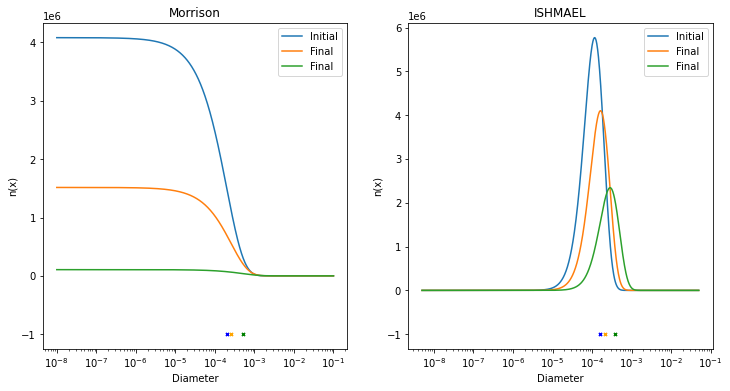

In [115]:
#get the distribution over time?
# print(i_dict['ni'])
fig, ax = plt.subplots(ncols=2, figsize=(12, 6))

timestep1, timestep2, timestep3     = 20, 97, 350

N_MORRISON1, Q_MORRISON1             = m_dict['ni'][timestep1], m_dict['qi'][timestep1]
N_ISHMAEL1, Q_ISHMAEL1, ANI_ISHMAEL1 = i_dict['ni'][timestep1], i_dict['qi'][timestep1], i_dict['ani'][timestep1]

N_MORRISON2, Q_MORRISON2             = m_dict['ni'][timestep2], m_dict['qi'][timestep2]
N_ISHMAEL2, Q_ISHMAEL2, ANI_ISHMAEL2 = i_dict['ni'][timestep2], i_dict['qi'][timestep2], i_dict['ani'][timestep2]

N_MORRISON3, Q_MORRISON3             = m_dict['ni'][timestep3], m_dict['qi'][timestep3]
N_ISHMAEL3, Q_ISHMAEL3, ANI_ISHMAEL3 = i_dict['ni'][timestep3], i_dict['qi'][timestep3], i_dict['ani'][timestep3]

print(ANI_ISHMAEL3)
dm1, f_m1 = get_gamma('M',  N_MORRISON1, Q_MORRISON1)
di1, f_i1 = get_gamma('I',  N_ISHMAEL1, Q_ISHMAEL1, ANI_ISHMAEL1)

dm2, f_m2 = get_gamma('M',  N_MORRISON2, Q_MORRISON2)
di2, f_i2 = get_gamma('I',  N_ISHMAEL2, Q_ISHMAEL2, ANI_ISHMAEL2)

dm3, f_m3 = get_gamma('M',  N_MORRISON3, Q_MORRISON3)
di3, f_i3 = get_gamma('I',  N_ISHMAEL3, Q_ISHMAEL3, ANI_ISHMAEL3)

ax[0].set_title('Morrison')
ax[0].plot(dm1,  f_m1,  label='Initial')
ax[0].plot(dm2,  f_m2,  label='Final')
ax[0].plot(dm3,  f_m3,  label='Final')

ax[1].set_title('ISHMAEL')
ax[1].plot(di1,  f_i1,    label='Initial')
ax[1].plot(di2,  f_i2,  label='Final')
ax[1].plot(di3,  f_i3,  label='Final')


#plot average
ax[0].scatter([1/((N_MORRISON1/Q_MORRISON1) * c * 6)**(1/3)], [-1e6],marker='x', s=10, c='blue')
ax[0].scatter([1/((N_MORRISON2/Q_MORRISON2) * c * 6)**(1/3)], [-1e6],marker='x', s=10, c='orange')
ax[0].scatter([1/((N_MORRISON3/Q_MORRISON3) * c * 6)**(1/3)], [-1e6],marker='x', s=10, c='green')

ax[1].scatter([4*ANI_ISHMAEL1], [-1e6],marker='x', s=10, c='blue')
ax[1].scatter([4*ANI_ISHMAEL2], [-1e6],marker='x', s=10, c='orange')
ax[1].scatter([4*ANI_ISHMAEL3], [-1e6],marker='x', s=10, c='green')


ax[0].legend() 
ax[0].set_xscale('log'), ax[0].set_xlabel("Diameter"), ax[0].set_ylabel("n(x)")

ax[1].legend()
ax[1].set_xscale('log'), ax[1].set_xlabel("Diameter"), ax[1].set_ylabel("n(x)")

In [ ]:
#plot distributions in M and I for several ratios 


fig, ax = plt.subplots(nrows=2, figsize=(12, 12))

timestep1, timestep2     = 20, 27

N_MORRISON1, Q_MORRISON1             = m_dict['ni'][timestep1], m_dict['qi'][timestep1]
N_ISHMAEL1, Q_ISHMAEL1, ANI_ISHMAEL1 = i_dict['ni'][timestep1], i_dict['qi'][timestep1], i_dict['ani'][timestep1]

N_MORRISON2, Q_MORRISON2             = m_dict['ni'][timestep2], m_dict['qi'][timestep2]
N_ISHMAEL2, Q_ISHMAEL2, ANI_ISHMAEL2 = i_dict['ni'][timestep2], i_dict['qi'][timestep2], i_dict['ani'][timestep2]



ns_qs   = [(1e2, 1e-9), (1e2, 1e-8), (1e2, 1e-7), (1e2, 1e-6)]
K_list =  ['$1 \\times 10^{-11}$','$1 \\times 10^{-10}$', '$1 \\times 10^{-9}$', '$1 \\times 10^{-8}$']
ds_init = 1
clist = ['blue', 'orange', 'red', 'gray']
tick=0

for pair in ns_qs:
    ni0, qi0 = pair
    ani0     = ((qi0*6)/(500*ni0*(4*np.pi*ao**(1-ds_init)/3)* gamma(6+ds_init)))**(1/(2+ds_init))
    
    dm1, f_m1 = get_gamma('M',  ni0, qi0)
    di1, f_i1 = get_gamma('I',  ni0, qi0, ani0)
    
    
    ax[0].plot(dm1, f_m1, ls = '--', c = clist[tick], label = K_list[tick])
    ax[1].plot(di1, f_i1, c = clist[tick])
    
    tick+=1

ax[0].legend() 
ax[0].set_xscale('log'), ax[1].set_xscale('log')
ax[0].set_xlabel("Diameter"), ax[1].set_xlabel("Diameter")
ax[0].set_ylabel("n(x)"), ax[1].set_ylabel("n(x)")
